In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import layers, models,Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, roc_auc_score, roc_curve, classification_report







In [3]:
# Load the column names
column_names = np.load('KukaColumnNames.npy', allow_pickle=True)

# Display the column names
print("Column Names:")
for i, name in enumerate(column_names):
    print(f"Signal {i+1}: {name}")


Column Names:
Signal 1: action
Signal 2: machine_nameKuka Robot_apparent_power
Signal 3: machine_nameKuka Robot_current
Signal 4: machine_nameKuka Robot_frequency
Signal 5: machine_nameKuka Robot_phase_angle
Signal 6: machine_nameKuka Robot_power
Signal 7: machine_nameKuka Robot_power_factor
Signal 8: machine_nameKuka Robot_reactive_power
Signal 9: machine_nameKuka Robot_voltage
Signal 10: sensor_id1_AccX
Signal 11: sensor_id1_AccY
Signal 12: sensor_id1_AccZ
Signal 13: sensor_id1_GyroX
Signal 14: sensor_id1_GyroY
Signal 15: sensor_id1_GyroZ
Signal 16: sensor_id1_q1
Signal 17: sensor_id1_q2
Signal 18: sensor_id1_q3
Signal 19: sensor_id1_q4
Signal 20: sensor_id1_temp
Signal 21: sensor_id2_AccX
Signal 22: sensor_id2_AccY
Signal 23: sensor_id2_AccZ
Signal 24: sensor_id2_GyroX
Signal 25: sensor_id2_GyroY
Signal 26: sensor_id2_GyroZ
Signal 27: sensor_id2_q1
Signal 28: sensor_id2_q2
Signal 29: sensor_id2_q3
Signal 30: sensor_id2_q4
Signal 31: sensor_id2_temp
Signal 32: sensor_id3_AccX
Signal 

-------------------------------------------------------------------------
Robot Operation Signals:

Signal 1: action

Signal 2: Apparent power

Signal 3: Current

Signal 4: Frequency

Signal 5: Phase angle

Signal 6: Power

Signal 7: Power factor

Signal 8: Reactive power

Signal 9: Voltage


Sensor Data (collected from various sensors):

Signals 10-86: Various accelerometers, gyroscopes, quaternions, and temperature data.

Anomaly Label:

Signal 87: Anomaly (likely to be the label for supervised learning).

------------------------------------------------------------------------------

In [4]:
# Load the data and column names
Kuka_Slow_data = np.load('KukaSlow.npy')
Kuka_Normal_data = np.load('KukaNormal.npy')

In [ ]:
# Check for NaN and Inf values for normal data
print("Checking for NaN values:")
print(np.isnan(Kuka_Normal_data).sum())  # NaN counts in the dataset

print("Checking for Inf values:")
print(np.isinf(Kuka_Normal_data).sum())  # Inf counts in the dataset


Checking for NaN values:
0
Checking for Inf values:
0


In [6]:
# Check for NaN and Inf values for slow data
print("Checking for NaN values:")
print(np.isnan(Kuka_Slow_data).sum())  # NaN counts in the dataset

print("Checking for Inf values:")
print(np.isinf(Kuka_Slow_data).sum())  # Inf counts in the dataset



Checking for NaN values:
0
Checking for Inf values:
0


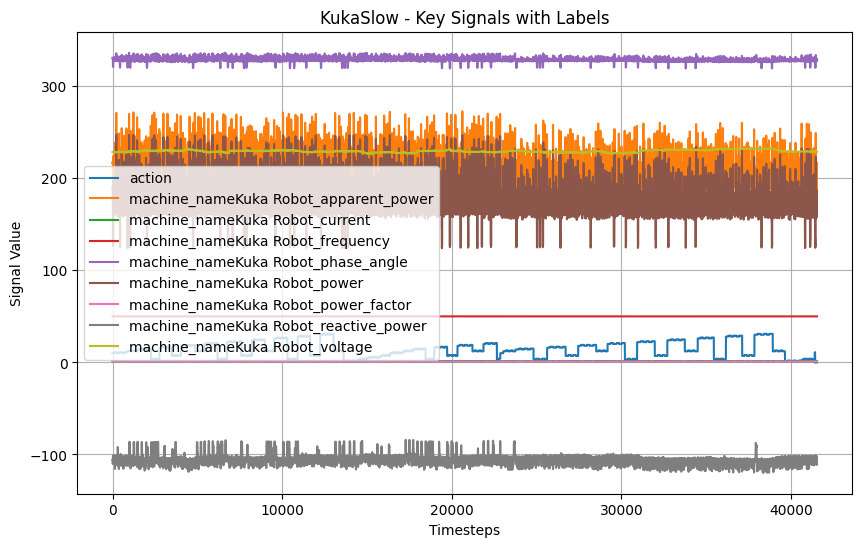

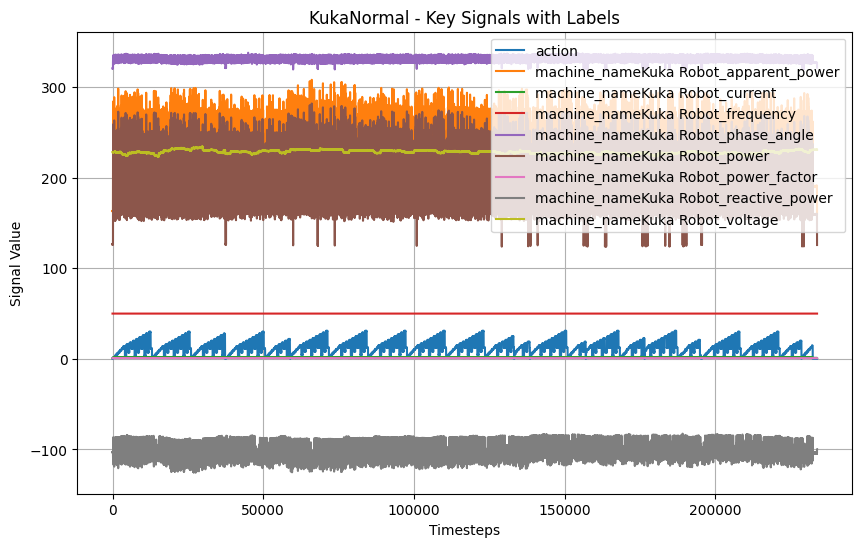

In [6]:
def plot_signals(data, column_names, title):
    plt.figure(figsize=(10, 6))
    for i in range(data.shape[1]):
        plt.plot(data[:, i], label=column_names[i])
    plt.title(title)
    plt.xlabel('Timesteps')
    plt.ylabel('Signal Value')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot Kuka Slow and Normal data
plot_signals(Kuka_Slow_data[:, :9], column_names[:9], 'KukaSlow - Key Signals with Labels')
plot_signals(Kuka_Normal_data[:, :9], column_names[:9], 'KukaNormal - Key Signals with Labels')


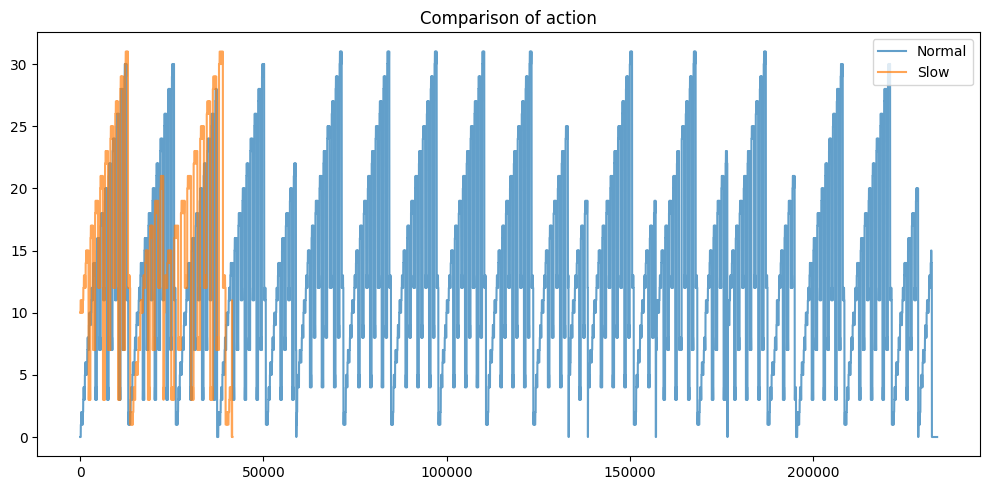

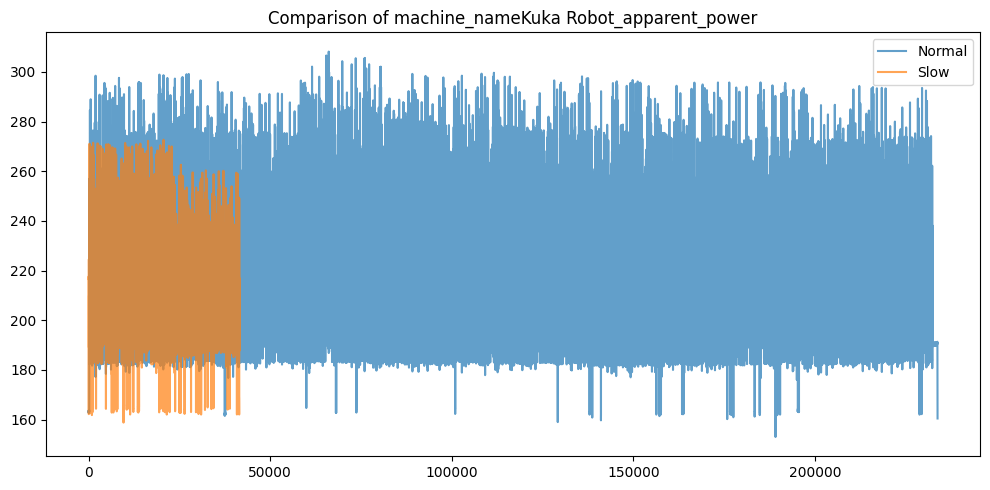

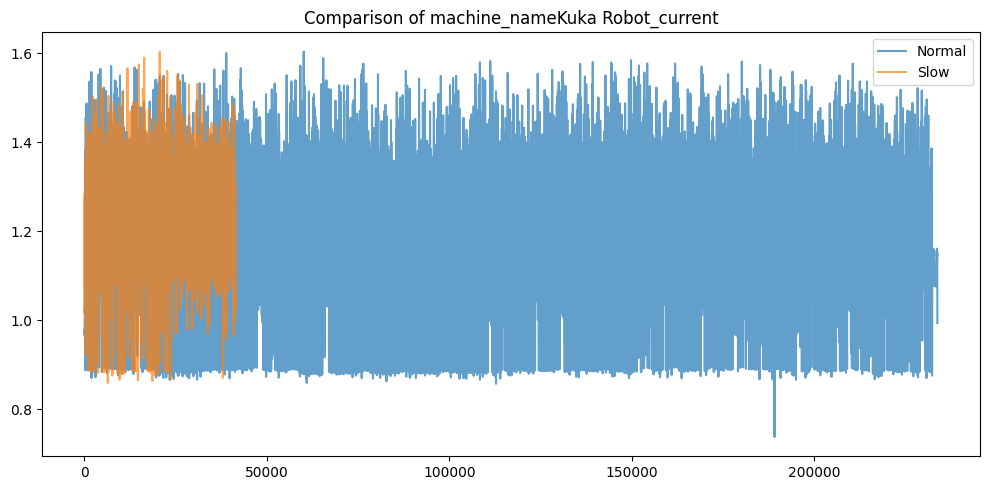

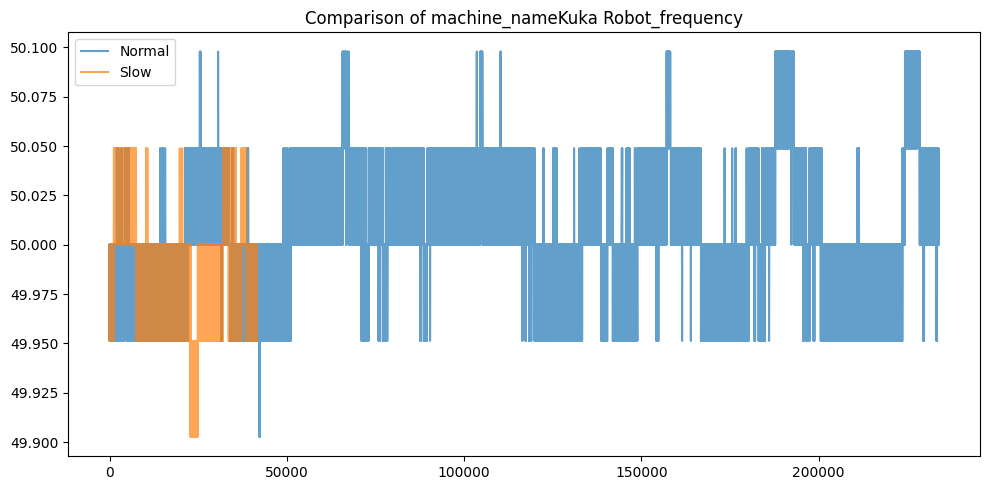

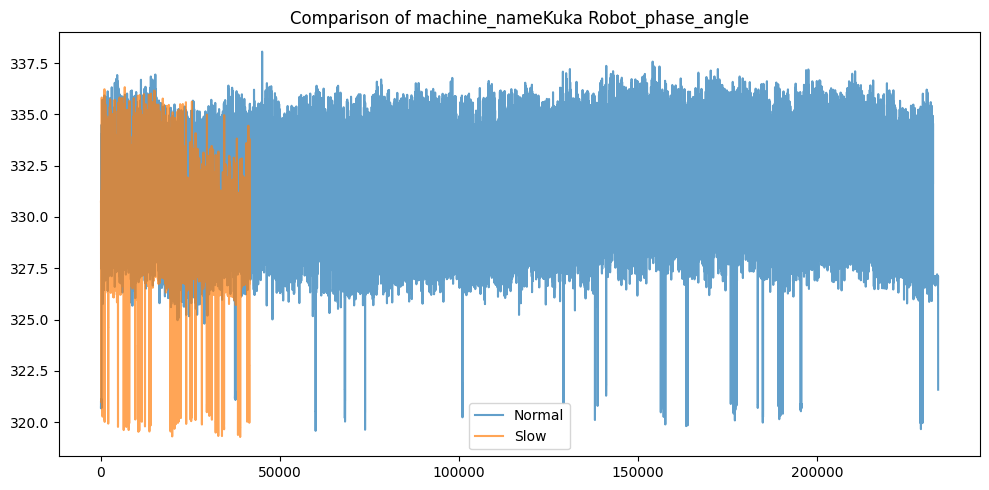

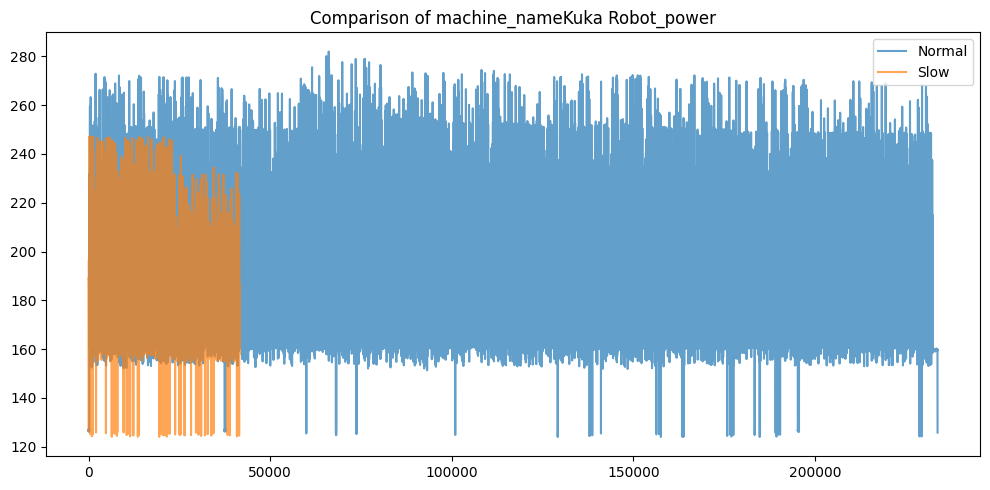

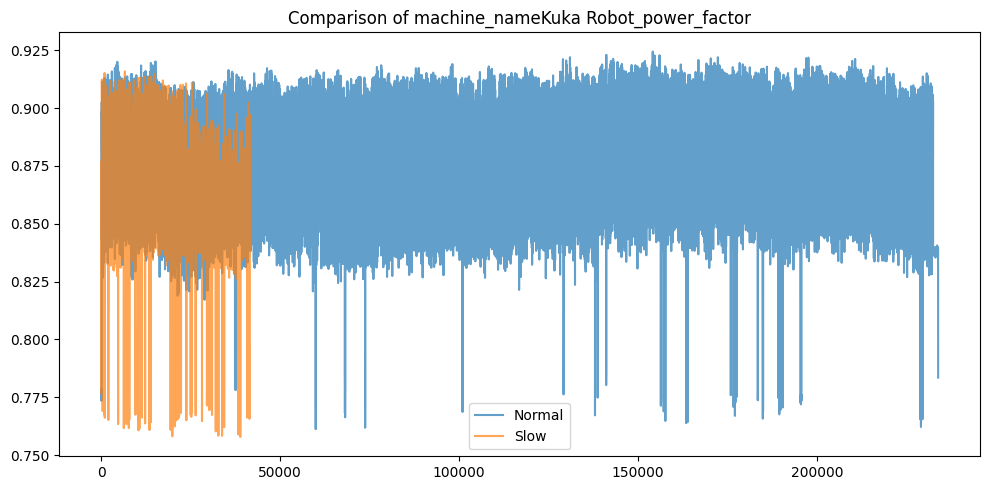

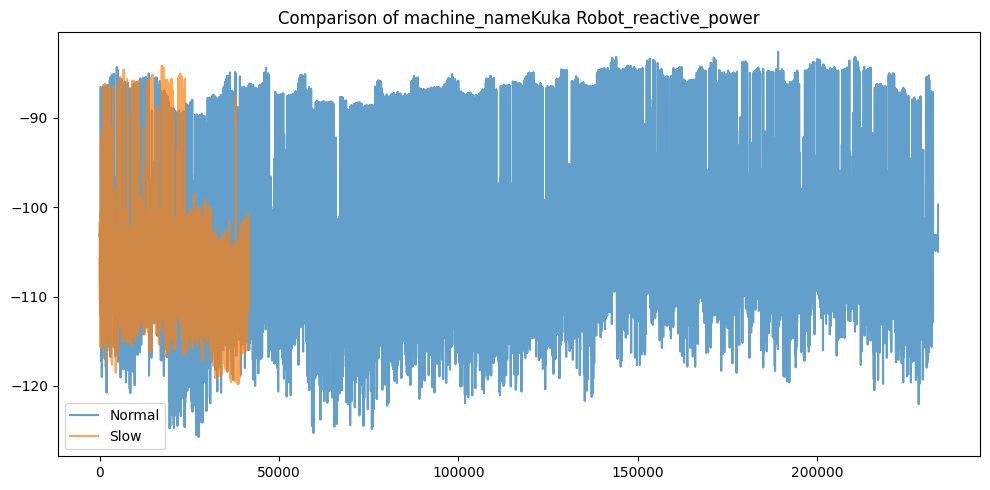

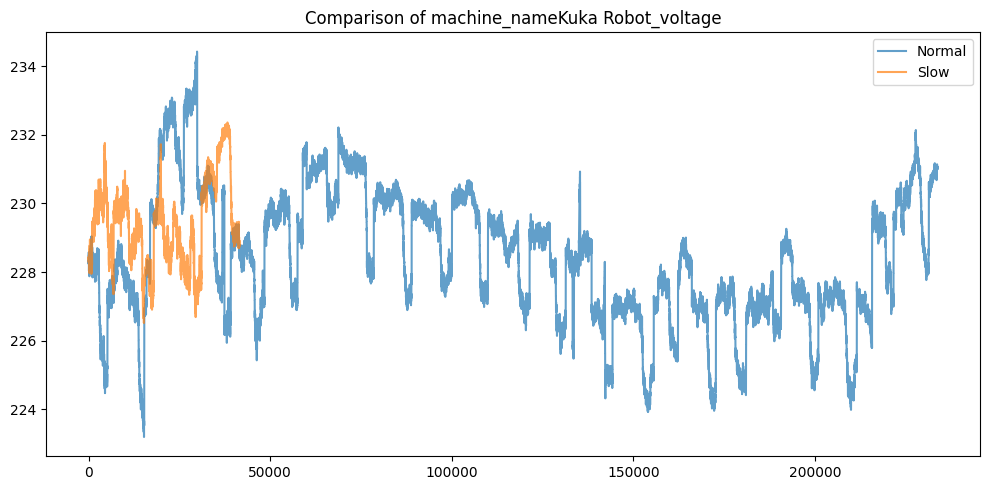

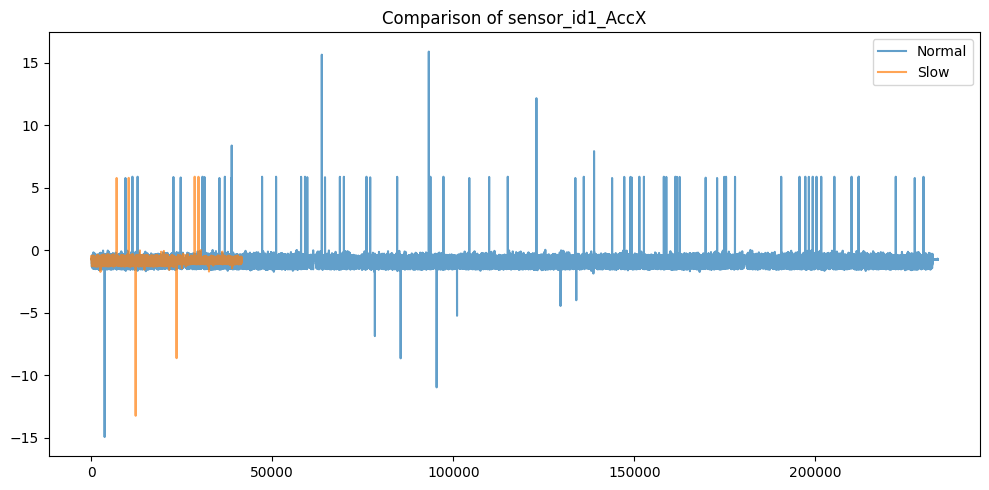

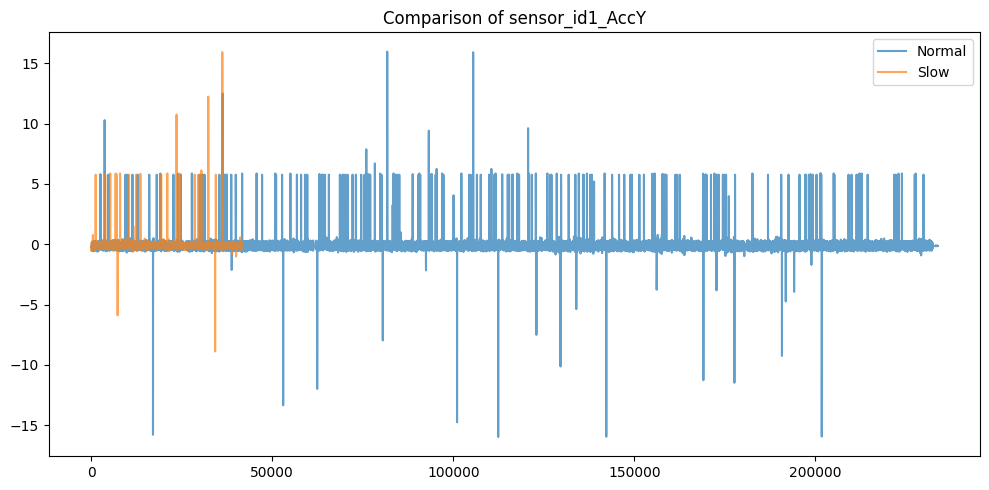

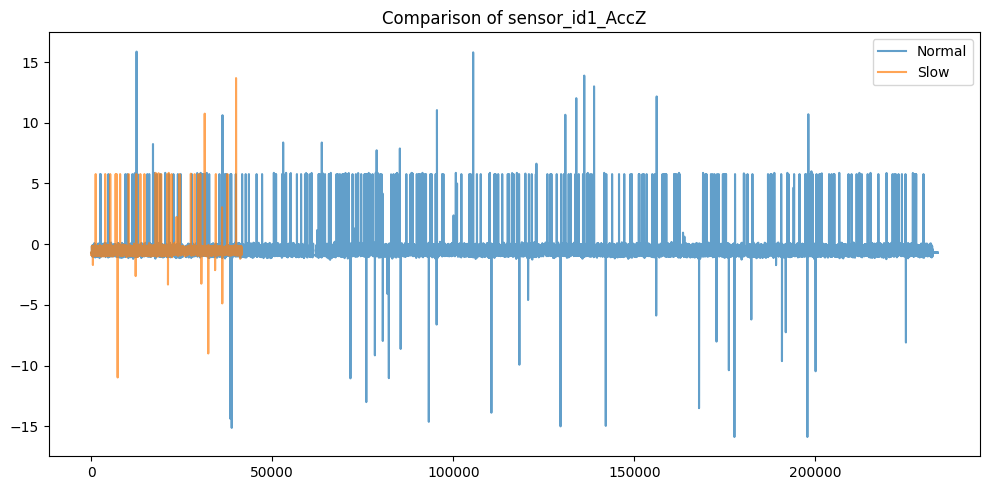

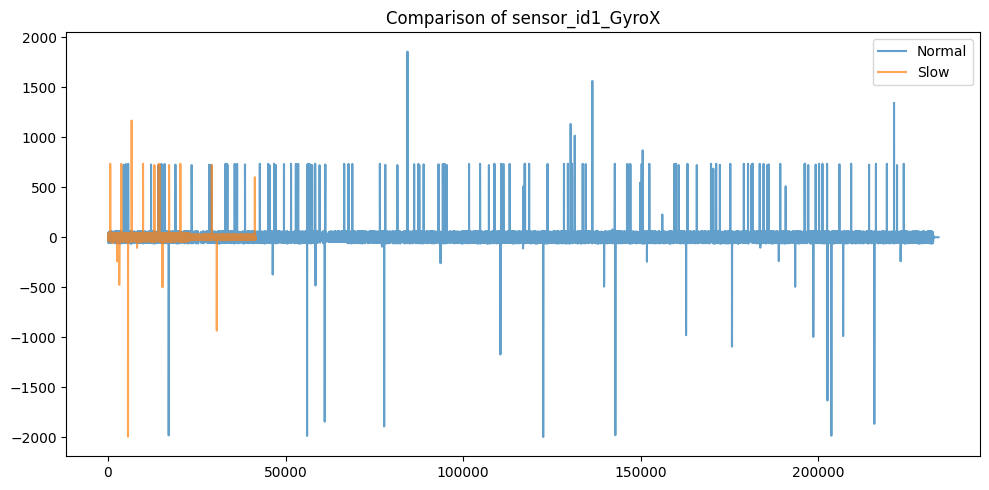

Signal: action
Normal Data - Mean: 12.929137866137422, Std Dev: 8.066929615480147
Slow Data - Mean: 14.088834320381338, Std Dev: 8.427127131898981
----------------------------------------
Signal: machine_nameKuka Robot_apparent_power
Normal Data - Mean: 214.8762986916362, Std Dev: 29.39362874231523
Slow Data - Mean: 207.0405821461072, Std Dev: 21.684998637175212
----------------------------------------
Signal: machine_nameKuka Robot_current
Normal Data - Mean: 1.1588203382579387, Std Dev: 0.15365112761351088
Slow Data - Mean: 1.185696743030478, Std Dev: 0.12147754976009452
----------------------------------------
Signal: machine_nameKuka Robot_frequency
Normal Data - Mean: 50.0063465391117, Std Dev: 0.03204006119834759
Slow Data - Mean: 49.98768215783139, Std Dev: 0.02958703964340511
----------------------------------------
Signal: machine_nameKuka Robot_phase_angle
Normal Data - Mean: 330.9453549220932, Std Dev: 2.936992074841086
Slow Data - Mean: 329.0085783327556, Std Dev: 2.7328965

In [7]:
# Define important signals for comparison 
important_signals = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# Plot comparisons for selected signals in subplots
for signal in important_signals:
    plt.figure(figsize=(10, 5))
    plt.plot(Kuka_Normal_data[:, signal], label='Normal', alpha=0.7)
    plt.plot(Kuka_Slow_data[:, signal], label='Slow', alpha=0.7)
    plt.title(f'Comparison of {column_names[signal]}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Calculate and print statistics for each selected signal
signal_stats = {}
for signal in important_signals:
    mean_normal = np.mean(Kuka_Normal_data[:, signal])
    std_normal = np.std(Kuka_Normal_data[:, signal])
    mean_slow = np.mean(Kuka_Slow_data[:, signal])
    std_slow = np.std(Kuka_Slow_data[:, signal])
    
    signal_stats[column_names[signal]] = {
        "Normal Mean": mean_normal,
        "Normal Std": std_normal,
        "Slow Mean": mean_slow,
        "Slow Std": std_slow
    }
    
    print(f"Signal: {column_names[signal]}")
    print(f"Normal Data - Mean: {mean_normal}, Std Dev: {std_normal}")
    print(f"Slow Data - Mean: {mean_slow}, Std Dev: {std_slow}")
    print("-" * 40)

-----------------------------------------------------------------------------
The Slow dataset clearly exhibits a reduced frequency and amplitude compared to the Normal dataset, pointing to a slowing down or inefficiency in the system. This difference in behavior over time could help in identifying anomalous patterns when using techniques like autoencoders for anomaly detection. The comparison shows that after an initial period of similarity, the "Slow" dataset deviates significantly from the normal one, which might represent the onset of anomalies in the system.
--------------------------------------  --------------------------------------

# Cross Validation

### Create Windows Function

In [56]:
def create_windows(data, window_size, overlap=0):
    assert 0 <= overlap < 1, "Overlap must be between 0 and 1."
    step = int(window_size * (1 - overlap))
    if step <= 0:
        raise ValueError("Step size must be positive.")
    windows = [data[i:i + window_size] for i in range(0, len(data) - window_size + 1, step)]
    return np.array(windows)


### Autoencoder Model 1 (Without Dropout)

In [104]:
def build_autoencoder_1(input_shape, learning_rate=0.0001):
    model = Sequential([
        Input(shape=(input_shape,)),  # Input layer

        # Encoder
        Dense(64, activation='relu'),  # Reduced number of neurons
        Dense(32, activation='relu'),  # Smaller bottleneck

        # Decoder
        Dense(64, activation='relu'),
        Dense(input_shape, activation='sigmoid')  # Output layer
    ])

    # Compile with Adam Optimizer and Mean Squared Error Loss
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='mse'
    )
    return model

### Autoencoder Model 2 

In [105]:
# Helper function to create a modular block with BatchNormalization and ReLU
def makeBlock(in_features, out_features):
    return models.Sequential([
        layers.Dense(out_features, activation=None),  # No activation yet
        layers.BatchNormalization(),
        layers.ReLU()  # Apply ReLU activation after batch normalization
    ])

# Updated autoencoder function using a modular block approach
def build_autoencoder_2(input_shape, learning_rate=0.0005):
    # Ensure input_shape is a tuple
    if isinstance(input_shape, int):
        input_shape = (input_shape,)  # Convert single integer to a tuple

    # Define input layer
    inputs = Input(shape=input_shape)

    # Encoder using blocks
    x = makeBlock(input_shape[0], 64)(inputs)  # Input -> 64 features
    x = makeBlock(64, 32)(x)                  # 64 -> 32 features (bottleneck)

    # Decoder using blocks
    x = makeBlock(32, 64)(x)                  # 32 -> 64 features
    outputs = layers.Dense(input_shape[0], activation='sigmoid')(x)  # Reconstruct input

    # Create and compile the autoencoder model
    autoencoder = models.Model(inputs, outputs)
    autoencoder.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    return autoencoder

### Cross Validation for both models(took a lot time for prossessing)

In [ ]:
# Define a range of window sizes and learning rates
window_sizes = [5, 20, 35, 50, 70, 100, 150, 200]
learning_rates = [0.01 , 0.001, 0.0005, 0.0001]  

# Placeholder dictionaries for storing results for each model
model_1_errors = {}
model_2_errors = {}
model_1_error_stats = {}
model_2_error_stats = {}

# Dictionaries to store normalized data, trained models, and reconstruction errors for each window size and learning rate
normalized_data = {
    "normal": {},  # Store normalized 'normal' data for each window size
    "slow": {}     # Store normalized 'slow' data for each window size
}
trained_autoencoders = {
    "model_1": {},  # Store Model 1 autoencoders for each window size
    "model_2": {}   # Store Model 2 autoencoders for each window size
}
reconstruction_errors = {
    "model_1": {},  # Store Model 1 reconstruction errors for each window size
    "model_2": {}   # Store Model 2 reconstruction errors for each window size
}
history_dict = {
    "model_1": {},  # Store the history of Model 1 training for each window size
    "model_2": {}   # Store the history of Model 2 training for each window size
}
learning_rate_info = {
    "model_1": {},  # Store learning rate info for Model 1
    "model_2": {}   # Store learning rate info for Model 2
}

# Function to evaluate reconstruction errors, save normalized data, store autoencoders, history, and learning rate info for a given model
def evaluate_model(autoencoder_fn, window_sizes, model_name, learning_rates):
    window_errors = {}
    for window_size in window_sizes:
        for lr in learning_rates:
            # Step 1: Generate windows with the current window size
            X_normal_windows = create_windows(Kuka_Normal_data, window_size=window_size, overlap=0.5)
            X_slow_windows = create_windows(Kuka_Slow_data, window_size=window_size, overlap=0.5)
            
            # Ensure we only use the first 86 features
            X_normal_windows = X_normal_windows[:, :, :86]
            X_slow_windows = X_slow_windows[:, :, :86]
            
            # Flatten the data for normalization
            windows_normal_reshaped = X_normal_windows.reshape(-1, X_normal_windows.shape[2])
            windows_slow_reshaped = X_slow_windows.reshape(-1, X_slow_windows.shape[2])

            # Combine normal and slow data for consistent scaling
            combined_data = np.concatenate((windows_normal_reshaped, windows_slow_reshaped), axis=0)

            # Normalize the combined data using MinMaxScaler
            scaler = MinMaxScaler(feature_range=(0, 1))  # Set range to [0, 1]
            scaler.fit(combined_data)  # Fit on combined data

            # Apply transformation to normal and slow data
            X_normal_minmax = scaler.transform(windows_normal_reshaped)
            X_slow_minmax = scaler.transform(windows_slow_reshaped)

            # Reshape back to 3D shape for further processing
            X_normal_minmax = X_normal_minmax.reshape(X_normal_windows.shape)
            X_slow_minmax = X_slow_minmax.reshape(X_slow_windows.shape)

            # Store normalized data for later use
            normalized_data["normal"][window_size] = X_normal_minmax
            normalized_data["slow"][window_size] = X_slow_minmax

            # Flatten windows for model input 
            X_normal_minmax_flat = X_normal_minmax.reshape((X_normal_minmax.shape[0], -1))
            X_slow_minmax_flat = X_slow_minmax.reshape((X_slow_minmax.shape[0], -1))

            # Step 2: Train the model on normal data windows with the current learning rate
            input_shape = X_normal_minmax_flat.shape[1]  
            autoencoder = autoencoder_fn(input_shape)
            autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mse')

            # Split data into training and validation sets 
            validation_split = 0.2  # 20% of the data will be used for validation
            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
            history = autoencoder.fit(X_normal_minmax_flat, X_normal_minmax_flat, epochs=50, batch_size=32, validation_split=validation_split,
                                      verbose=0, callbacks=[early_stopping])

            # Store the trained autoencoder and its history
            trained_autoencoders[model_name][window_size] = autoencoder
            history_dict[model_name][window_size] = history  # Store history for later use

            # Store learning rate info
            if window_size not in learning_rate_info[model_name]:
                learning_rate_info[model_name][window_size] = []

            learning_rate_info[model_name][window_size].append({
                'Learning Rate': lr,
                'Final Loss': history.history['loss'][-1],
                'Final Val Loss': history.history['val_loss'][-1]
            })

            # Step 3: Calculate reconstruction error on test or slow data
            reconstructed = autoencoder.predict(X_slow_minmax_flat)
            reconstruction_error = np.mean(np.square(reconstructed - X_slow_minmax_flat), axis=1)
            
            # Step 4: Store the reconstruction errors for analysis
            window_errors[window_size] = reconstruction_error
            reconstruction_errors[model_name][window_size] = reconstruction_error  # Store reconstruction error

    return window_errors

# Evaluate each model with different learning rates and store results
model_1_errors = evaluate_model(build_autoencoder_1, window_sizes, "model_1", learning_rates)
model_2_errors = evaluate_model(build_autoencoder_2, window_sizes, "model_2", learning_rates)

# Calculate error statistics (mean and std dev) for each model
for window_size, errors in model_1_errors.items():
    model_1_error_stats[window_size] = {
        'Mean Error': np.mean(errors),
        'Std Dev Error': np.std(errors)
    }

for window_size, errors in model_2_errors.items():
    model_2_error_stats[window_size] = {
        'Mean Error': np.mean(errors),
        'Std Dev Error': np.std(errors)
    }

# Display results in DataFrame for each model
model_1_error_stats_df = pd.DataFrame(model_1_error_stats).T
model_2_error_stats_df = pd.DataFrame(model_2_error_stats).T

print("Reconstruction Error Statistics for Different Window Sizes - Model 1:")
print(model_1_error_stats_df)
print("\nReconstruction Error Statistics for Different Window Sizes - Model 2:")
print(model_2_error_stats_df)


649/649 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━

In [60]:
# Function to display learning rate info for each model in a nice table format
def display_learning_rate_info(model_name, learning_rate_info):
    for window_size, lr_info_list in learning_rate_info.items():
        # Create a DataFrame to display the learning rate info for each window size
        df = pd.DataFrame(lr_info_list)
        df['Window Size'] = window_size  # Add window size to the DataFrame
        df = df[['Window Size', 'Learning Rate', 'Final Loss', 'Final Val Loss']]  # Reorder columns
        # Display the learning rate info for each model
        print(f"\nLearning Rate Info for {model_name} - Window Size {window_size}:")
        print(df.to_string(index=False))

# Display learning rate info for Model 1
display_learning_rate_info("Model 1", learning_rate_info["model_1"])


# Display learning rate info for Model 2
display_learning_rate_info("Model 2", learning_rate_info["model_2"])


Learning Rate Info for Model 1 - Window Size 5:
 Window Size  Learning Rate  Final Loss  Final Val Loss
           5         0.0100    0.002769        0.009813
           5         0.0010    0.001873        0.003599
           5         0.0005    0.002056        0.005306
           5         0.0001    0.001405        0.002381

Learning Rate Info for Model 1 - Window Size 20:
 Window Size  Learning Rate  Final Loss  Final Val Loss
          20         0.0100    0.005394        0.009756
          20         0.0010    0.002555        0.004566
          20         0.0005    0.004112        0.007611
          20         0.0001    0.004488        0.007096

Learning Rate Info for Model 1 - Window Size 35:
 Window Size  Learning Rate  Final Loss  Final Val Loss
          35         0.0100    0.007085        0.014538
          35         0.0010    0.004062        0.006888
          35         0.0005    0.004445        0.007688
          35         0.0001    0.005220        0.008472

Learning R

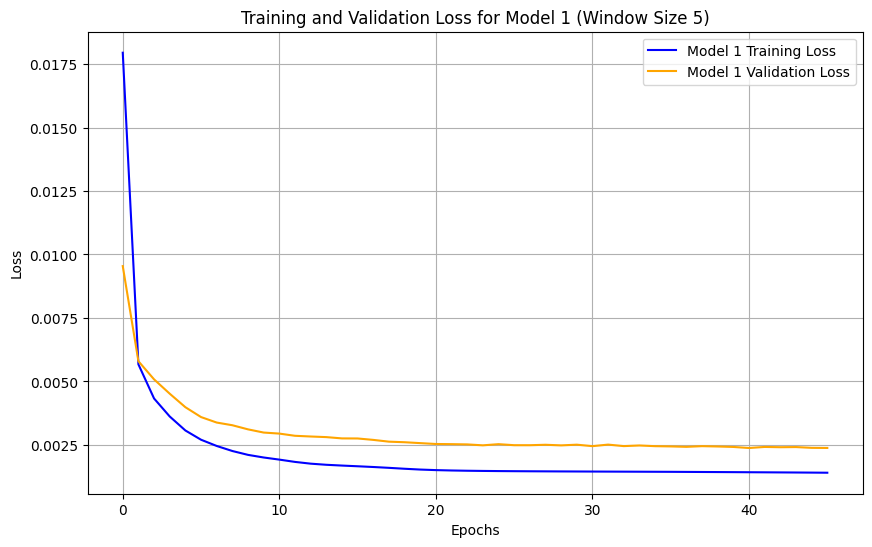

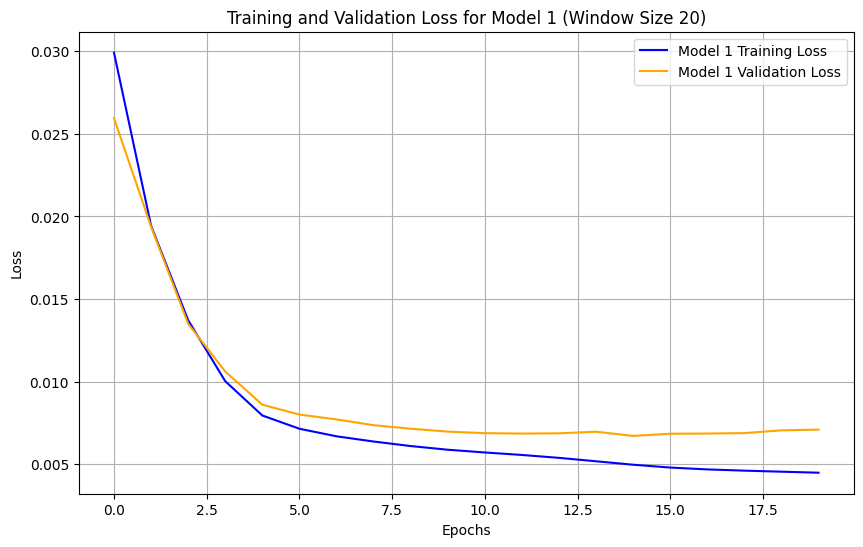

In [61]:
# Plot the loss for Model 1 with window size 5
plt.figure(figsize=(10, 6))
plt.plot(history_dict["model_1"][5].history['loss'], label='Model 1 Training Loss', color='blue')
plt.plot(history_dict["model_1"][5].history['val_loss'], label='Model 1 Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Model 1 (Window Size 5)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the loss for Model 1 with window size 20
plt.figure(figsize=(10, 6))
plt.plot(history_dict["model_1"][20].history['loss'], label='Model 1 Training Loss', color='blue')
plt.plot(history_dict["model_1"][20].history['val_loss'], label='Model 1 Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Model 1 (Window Size 20)')
plt.legend()
plt.grid(True)
plt.show()




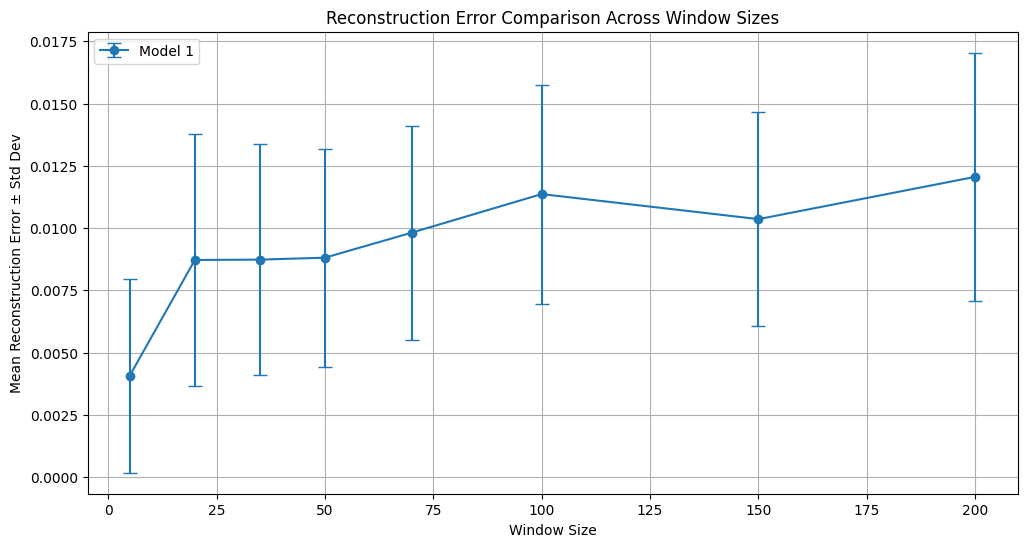

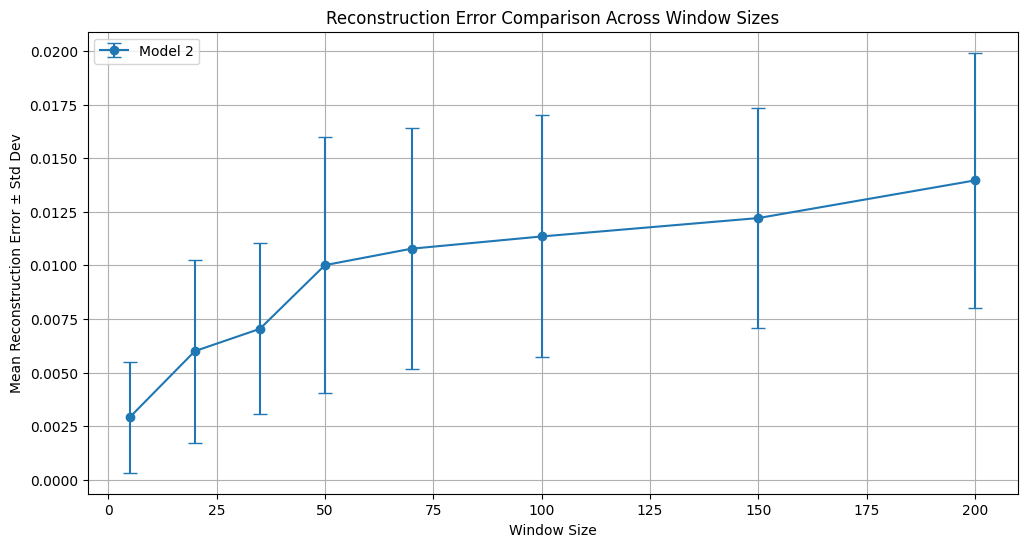

In [62]:
# Convert the dictionaries into DataFrames for easier plotting
model_1_error_stats_df = pd.DataFrame(model_1_error_stats).T

# Plot mean reconstruction error with standard deviation error bars for Model 1
plt.figure(figsize=(12, 6))
plt.errorbar(
    model_1_error_stats_df.index, 
    model_1_error_stats_df['Mean Error'], 
    yerr=model_1_error_stats_df['Std Dev Error'], 
    fmt='-o', capsize=5, label='Model 1'
)
plt.xlabel("Window Size")
plt.ylabel("Mean Reconstruction Error ± Std Dev")
plt.title("Reconstruction Error Comparison Across Window Sizes")
plt.legend()
plt.grid(True)
plt.show()


# Convert the dictionaries into DataFrames for easier plotting
model_2_error_stats_df = pd.DataFrame(model_2_error_stats).T

# Plot mean reconstruction error with standard deviation error bars for Model 2
plt.figure(figsize=(12, 6))
plt.errorbar(
    model_2_error_stats_df.index, 
    model_2_error_stats_df['Mean Error'], 
    yerr=model_2_error_stats_df['Std Dev Error'], 
    fmt='-o', capsize=5, label='Model 2'
)
plt.xlabel("Window Size")
plt.ylabel("Mean Reconstruction Error ± Std Dev")
plt.title("Reconstruction Error Comparison Across Window Sizes")
plt.legend()
plt.grid(True)
plt.show()


# End of Cross Validation

In [106]:
# Access normalized data with window size 5
X_normal_5 = normalized_data["normal"][5]
X_slow_5 = normalized_data["slow"][5]
print(X_normal_5.shape, X_slow_5.shape) 

(116894, 5, 86) (20767, 5, 86)


In [ ]:
print("Normal Data Range:", X_normal_5.min(), X_normal_5.max())
print("Slow Data  Range:", X_slow_5.min(), X_slow_5.max())

Normal Data Range: 0.0 1.0000000000000002
Slow Data  Range: 0.0 1.0


In [ ]:
print("Batch - Normal Data Samples:", X_normal_5.shape[0])
print("Batch - Slow Data Samples:", X_slow_5.shape[0])

Batch - Normal Data Samples: 116894
Batch - Slow Data Samples: 20767


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Autoencoder Model 1 for Window Size 20

In [ ]:
# Flatten windows for model input 
X_normal_minmax_flat_5 = X_normal_5.reshape((X_normal_5.shape[0], -1)) 
X_slow_minmax_flat_5 = X_slow_5.reshape((X_slow_5.shape[0], -1))



#Train the model on normal data windows
input_shape = X_normal_minmax_flat_5.shape[1] 

autoencoder_1 = build_autoencoder_1(input_shape)
autoencoder_1.summary()
# Flatten the data for the model
X_train = X_normal_5.reshape(X_normal_5.shape[0], input_shape).astype(np.float32)

# Train the autoencoder

history_1 = autoencoder_1.fit(X_train, X_train, epochs=100, batch_size=32,
                              validation_split=0.1, verbose=1, callbacks=[early_stopping])




Model: "sequential_347"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_700 (Dense)               │ (None, 64)             │        27,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_701 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_702 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_703 (Dense)               │ (None, 430)            │        27,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,726 (233.30 KB)

 Trainable params: 59,726 (233.30 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0280 - val_loss: 0.0073
Epoch 2/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 3/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 4/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0039 - val_loss: 0.0041
Epoch 5/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 6/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0030 - val_loss: 0.0033
Epoch 7/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 8/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 9/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 10/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0023 - val_loss: 0.0028
Epoch 11/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 0.0022 - val_loss: 0.0027
Epoch 12

# Train Autoencoder Model 2  for Window Size 20

In [113]:
autoencoder_2 = build_autoencoder_2(input_shape)
autoencoder_2.summary()

# Train the autoencoder

history_2 = autoencoder_2.fit(
    X_train, X_train, epochs=100, batch_size=32, validation_split=0.1,
    callbacks=[early_stopping], verbose=1)

Model: "functional_490"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_413 (InputLayer)    │ (None, 430)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_348 (Sequential)     │ (None, 64)             │        27,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_349 (Sequential)     │ (None, 32)             │         2,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_350 (Sequential)     │ (None, 64)             │         2,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_707 (Dense)               │ (None, 430)            │        27,950 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,366 (235.80 KB)

 Trainable params: 60,046 (234.55 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - loss: 0.0153 - val_loss: 0.0047
Epoch 2/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 3/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 43s 11ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 4/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 5/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 6/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 7/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 8/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 10/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 11/100
3288/3288 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 0.0018 - val_loss: 0.001

In [114]:
#save the trained models for later use to avoid retraining
autoencoder_1.save('autoencoder_1.keras')
autoencoder_2.save('autoencoder_2.keras')



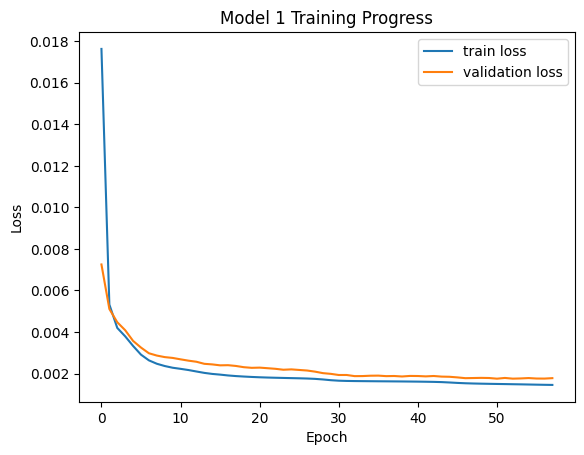

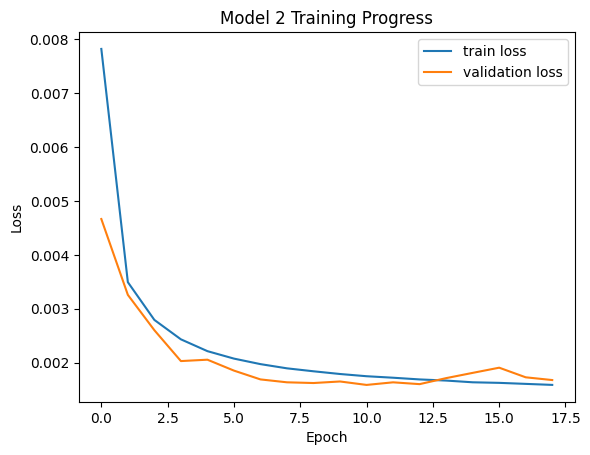

In [115]:
# Plotting for Model 1
plt.plot(history_1.history['loss'], label='train loss')
plt.plot(history_1.history['val_loss'], label='validation loss')
plt.title('Model 1 Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting for Model 2
plt.plot(history_2.history['loss'], label='train loss')
plt.plot(history_2.history['val_loss'], label='validation loss')
plt.title('Model 2 Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [116]:
window_size = 5
# Reshape windows for prediction
num_features = X_normal_5.shape[2]
X_slow = X_slow_5.reshape(X_slow_5.shape[0], window_size * num_features).astype(np.float32)
X_normal = X_normal_5.reshape(X_normal_5.shape[0], window_size * num_features).astype(np.float32)


# Predict the reconstruction for slow and normal data with both autoencoders
reconstructed_slow_1 = autoencoder_1.predict(X_slow)
reconstructed_slow_2 = autoencoder_2.predict(X_slow)
reconstructed_normal_1 = autoencoder_1.predict(X_normal)
reconstructed_normal_2 = autoencoder_2.predict(X_normal)

# Calculate reconstruction errors for slow and normal data
reconstruction_error_slow_1 = np.mean(np.square(X_slow - reconstructed_slow_1), axis=1)
reconstruction_error_slow_2 = np.mean(np.square(X_slow - reconstructed_slow_2), axis=1)
reconstruction_error_normal_1 = np.mean(np.square(X_normal - reconstructed_normal_1), axis=1)
reconstruction_error_normal_2 = np.mean(np.square(X_normal - reconstructed_normal_2), axis=1)

# Print individual reconstruction errors
print("Reconstruction Error for Windows Normal (Autoencoder 1):")
print(reconstruction_error_normal_1)
print("\nReconstruction Error for Windows Slow (Autoencoder 1):")
print(reconstruction_error_slow_1)

print("\nReconstruction Error for Windows Normal (Autoencoder 2):")
print(reconstruction_error_normal_2)
print("\nReconstruction Error for Windows Slow (Autoencoder 2):")
print(reconstruction_error_slow_2)

# Calculate and print average reconstruction errors for comparison
avg_error_normal_1 = np.mean(reconstruction_error_normal_1)
avg_error_slow_1 = np.mean(reconstruction_error_slow_1)
avg_error_normal_2 = np.mean(reconstruction_error_normal_2)
avg_error_slow_2 = np.mean(reconstruction_error_slow_2)
variance_error_normal_1 = np.var(reconstruction_error_normal_1)
variance_error_slow_1 = np.var(reconstruction_error_slow_1) 
variance_error_normal_2 = np.var(reconstruction_error_normal_2)
variance_error_slow_2 = np.var(reconstruction_error_slow_2)




print(f"\nAverage Reconstruction Error (Autoencoder 1) - Normal Data: {avg_error_normal_1}")
print(f"Average Reconstruction Error (Autoencoder 1) - Slow Data: {avg_error_slow_1}")
print(f"\nAverage Reconstruction Error (Autoencoder 2) - Normal Data: {avg_error_normal_2}")
print(f"Average Reconstruction Error (Autoencoder 2) - Slow Data: {avg_error_slow_2}")
print(f"\nVariance of Reconstruction Error (Autoencoder 1) - Normal Data: {variance_error_normal_1}")
print(f"Variance of Reconstruction Error (Autoencoder 1) - Slow Data: {variance_error_slow_1}")
print(f"\nVariance of Reconstruction Error (Autoencoder 2) - Normal Data: {variance_error_normal_2}")
print(f"Variance of Reconstruction Error (Autoencoder 2) - Slow Data: {variance_error_slow_2}")


649/649 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Reconstruction Error for Windows Normal (Autoencoder 1):
[0.00126706 0.00137116 0.00138461 ... 0.00175289 0.00175275 0.00174731]

Reconstruction Error for Windows Slow (Autoencoder 1):
[0.00272491 0.00183659 0.00170116 ... 0.0062088  0.00601411 0.00561685]

Reconstruction Error for Windows Normal (Autoencoder 2):
[0.00165148 0.00176836 0.0018156  ... 0.00190004 0.00190028 0.00189986]

Reconstruction Error for Windows Slow (Autoencoder 2):
[0.00306264 0.00187011 0.0017519  ... 0.00529359 0.00527068 0.00504211]

Average Reconstruction Error (Autoencoder 1) - Normal Data: 0.0015241759829223156
Average Reconstruction Error (Autoencoder 1) - Slow Data: 0.0037098038010299206

Average Reconstruction Error (Autoencoder 2) - Normal Data: 0.0011119111441075802
Average Reconstruction Error (Autoencoder 2) - Slow Data: 0.00326517410

Higher reconstruction errors indicate that the autoencoder struggled to recreate the input accurately, suggesting that the input may be an anomaly.

If reconstruction_error values for windows_slow are significantly higher than for normal data, it implies that windows_slow likely contains anomalies.

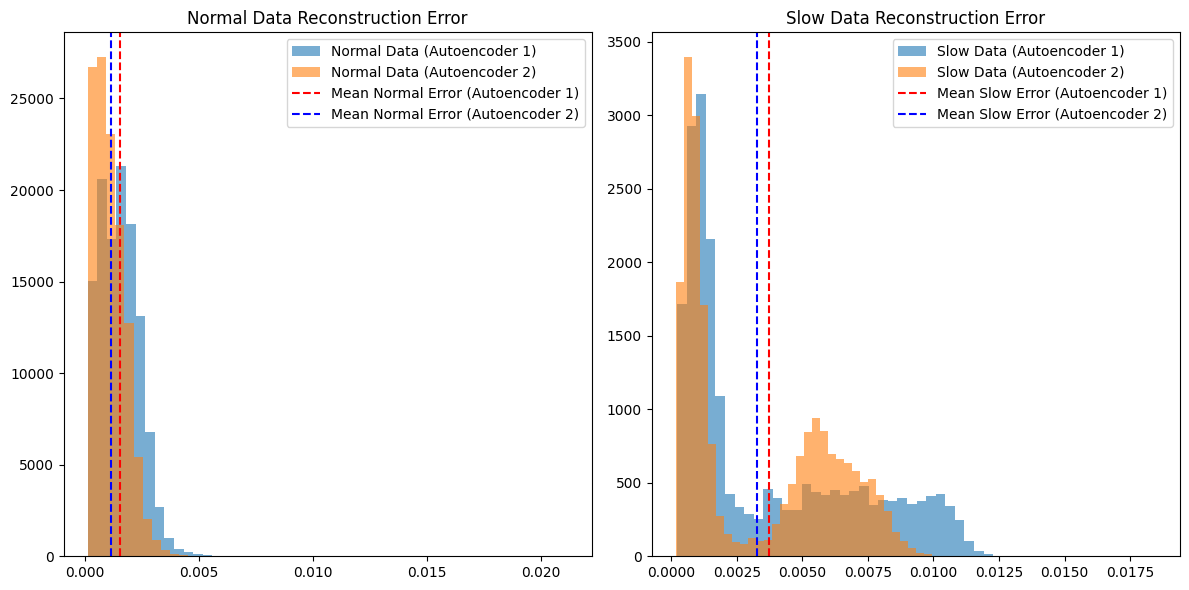

In [117]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(reconstruction_error_normal_1, bins=50, alpha=0.6, label='Normal Data (Autoencoder 1)')
plt.hist(reconstruction_error_normal_2, bins=50, alpha=0.6, label='Normal Data (Autoencoder 2)')
plt.axvline(x=np.mean(reconstruction_error_normal_1), color='red', linestyle='--', label='Mean Normal Error (Autoencoder 1)')
plt.axvline(x=np.mean(reconstruction_error_normal_2), color='blue', linestyle='--', label='Mean Normal Error (Autoencoder 2)')
plt.legend()
plt.title('Normal Data Reconstruction Error')

plt.subplot(1, 2, 2)
plt.hist(reconstruction_error_slow_1, bins=50, alpha=0.6, label='Slow Data (Autoencoder 1)')
plt.hist(reconstruction_error_slow_2, bins=50, alpha=0.6, label='Slow Data (Autoencoder 2)')
plt.axvline(x=np.mean(reconstruction_error_slow_1), color='red', linestyle='--', label='Mean Slow Error (Autoencoder 1)')
plt.axvline(x=np.mean(reconstruction_error_slow_2), color='blue', linestyle='--', label='Mean Slow Error (Autoencoder 2)')
plt.legend()
plt.title('Slow Data Reconstruction Error')

plt.tight_layout()
plt.show()


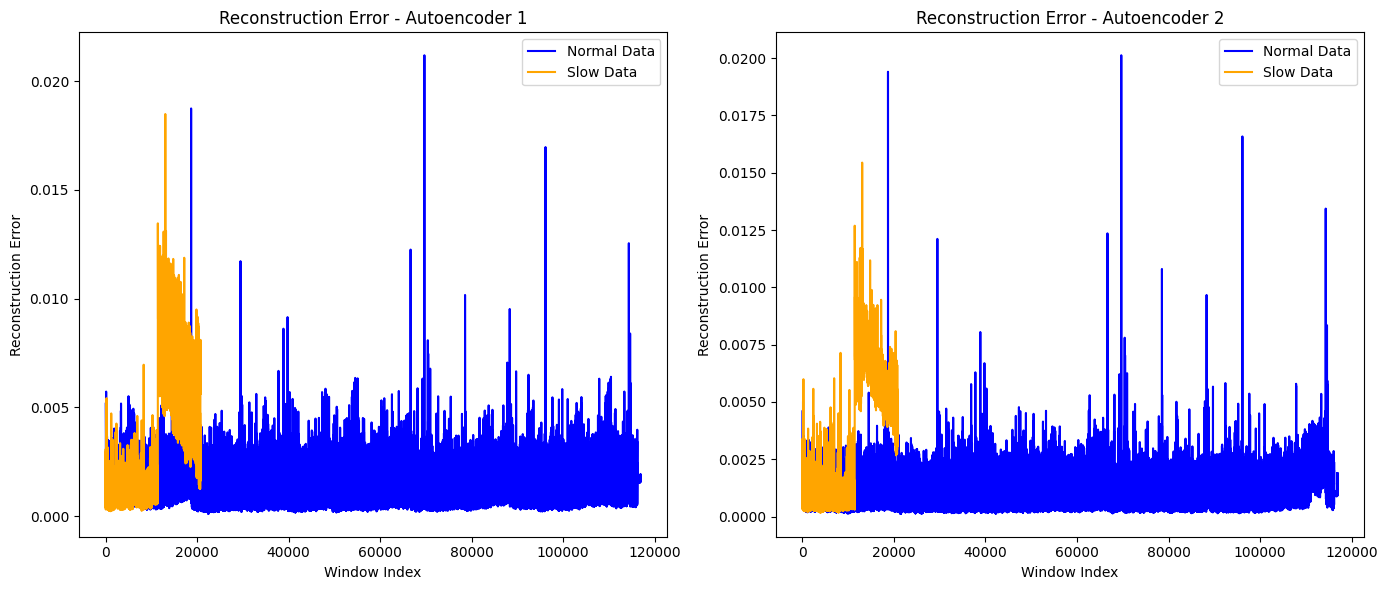

In [118]:
# Plot reconstruction errors for windows_normal and windows_slow
plt.figure(figsize=(14, 6))

# Plot for Autoencoder 1
plt.subplot(1, 2, 1)
plt.plot(reconstruction_error_normal_1, label="Normal Data", color='blue')
plt.plot(reconstruction_error_slow_1, label="Slow Data", color='orange')
plt.title("Reconstruction Error - Autoencoder 1")
plt.xlabel("Window Index")
plt.ylabel("Reconstruction Error")
plt.legend()

# Plot for Autoencoder 2
plt.subplot(1, 2, 2)
plt.plot(reconstruction_error_normal_2, label="Normal Data", color='blue')
plt.plot(reconstruction_error_slow_2, label="Slow Data", color='orange')
plt.title("Reconstruction Error - Autoencoder 2")
plt.xlabel("Window Index")
plt.ylabel("Reconstruction Error")
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Arash\AppData\Local\Temp\ipykernel_22516\3533402228.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([reconstruction_error_normal_1, reconstruction_error_slow_1], labels=["Normal", "Slow"])
C:\Users\Arash\AppData\Local\Temp\ipykernel_22516\3533402228.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([reconstruction_error_normal_2, reconstruction_error_slow_2], labels=["Normal", "Slow"])


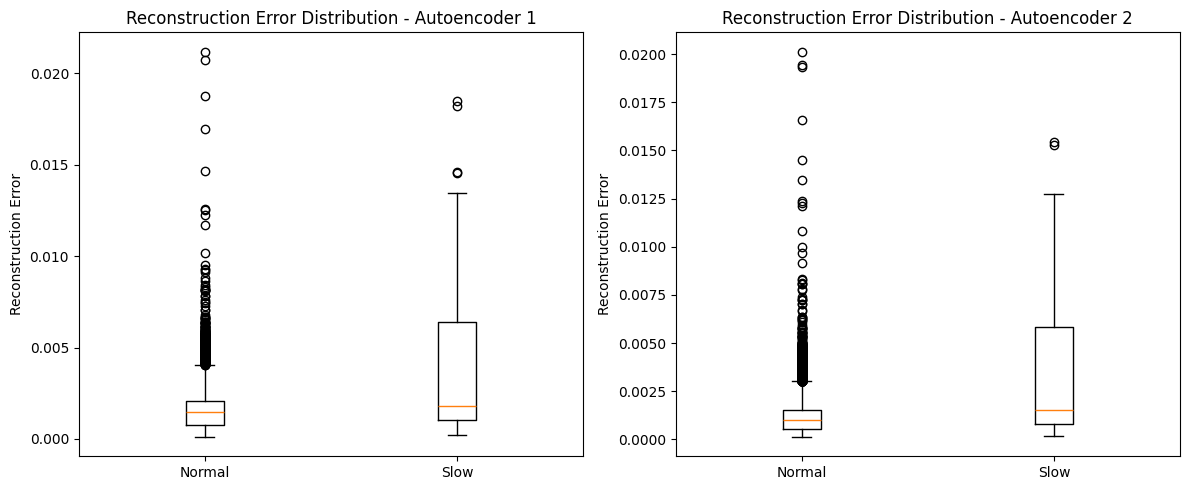

In [119]:
# Box plots for Autoencoder 1 and 2
plt.figure(figsize=(12, 5))

# Autoencoder 1
plt.subplot(1, 2, 1)
plt.boxplot([reconstruction_error_normal_1, reconstruction_error_slow_1], labels=["Normal", "Slow"])
plt.title("Reconstruction Error Distribution - Autoencoder 1")
plt.ylabel("Reconstruction Error")

# Autoencoder 2
plt.subplot(1, 2, 2)
plt.boxplot([reconstruction_error_normal_2, reconstruction_error_slow_2], labels=["Normal", "Slow"])
plt.title("Reconstruction Error Distribution - Autoencoder 2")
plt.ylabel("Reconstruction Error")

plt.tight_layout()
plt.show()


Thresholds:
autoencoder_1_95: 0.002946409804280847
autoencoder_1_99: 0.003749533975496888
autoencoder_2_95: 0.0023041740176267915
autoencoder_2_99: 0.0030596191482618437

Autoencoder 1:
95th Percentile Anomalies: 42.55% of data classified as anomalous.
99th Percentile Anomalies: 39.39% of data classified as anomalous.

Autoencoder 2:
95th Percentile Anomalies: 46.34% of data classified as anomalous.
99th Percentile Anomalies: 45.18% of data classified as anomalous.


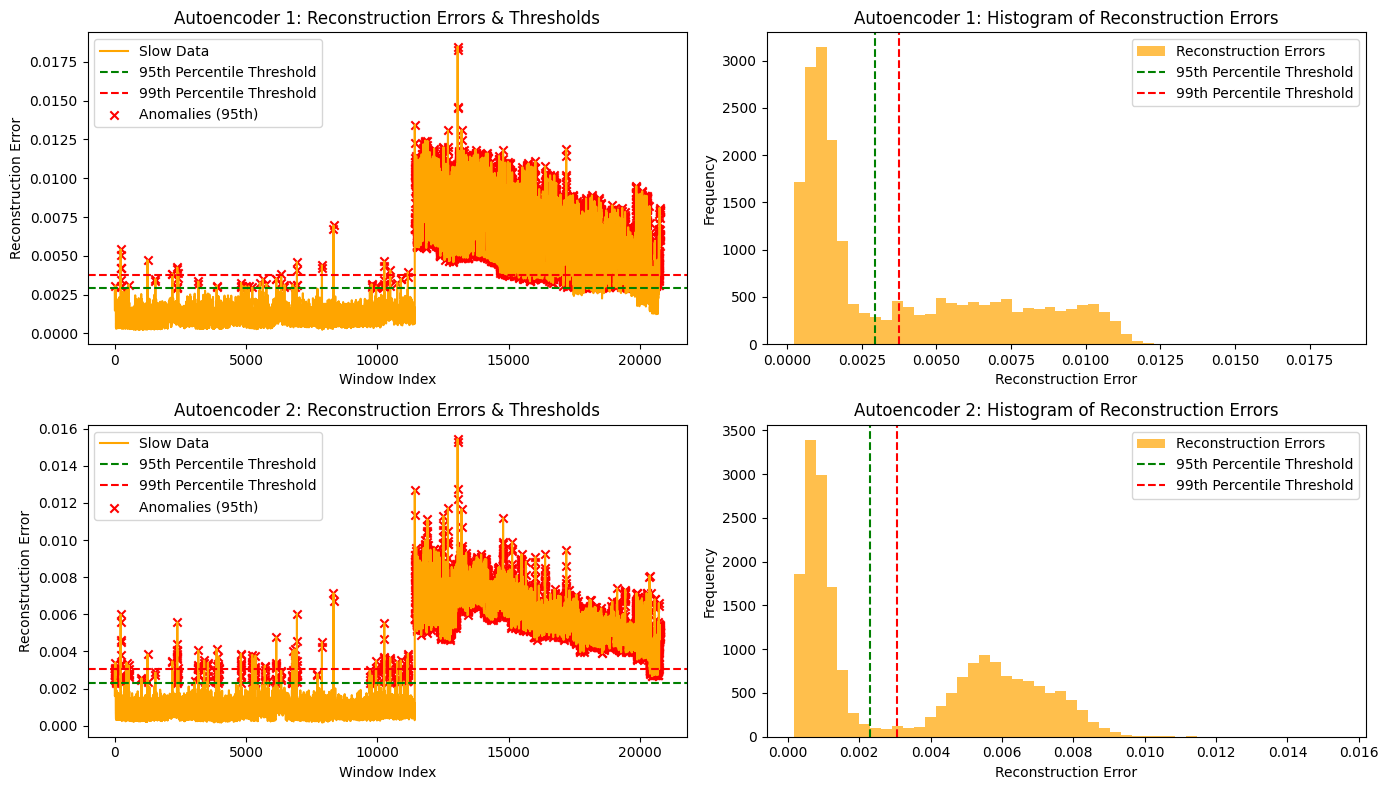

In [120]:
# Calculate thresholds
thresholds = {}
for i, error in enumerate([reconstruction_error_normal_1, reconstruction_error_normal_2], start=1):
    thresholds[f'autoencoder_{i}_95'] = np.percentile(error, 95)
    thresholds[f'autoencoder_{i}_99'] = np.percentile(error, 99)

# Detect anomalies
def detect_anomalies(reconstruction_error, threshold):
    return reconstruction_error > threshold

is_anomaly_slow_1_95 = detect_anomalies(reconstruction_error_slow_1, thresholds['autoencoder_1_95'])
is_anomaly_slow_2_95 = detect_anomalies(reconstruction_error_slow_2, thresholds['autoencoder_2_95'])
is_anomaly_slow_1_99 = detect_anomalies(reconstruction_error_slow_1, thresholds['autoencoder_1_99'])
is_anomaly_slow_2_99 = detect_anomalies(reconstruction_error_slow_2, thresholds['autoencoder_2_99'])

# Print Thresholds
print("Thresholds:")
for key, value in thresholds.items():
    print(f"{key}: {value}")

# Print Anomaly Results
def print_anomaly_stats(autoencoder_id, slow_95, slow_99):
    print(f"\nAutoencoder {autoencoder_id}:")
    print(f"95th Percentile Anomalies: {np.mean(slow_95) * 100:.2f}% of data classified as anomalous.")
    print(f"99th Percentile Anomalies: {np.mean(slow_99) * 100:.2f}% of data classified as anomalous.")

print_anomaly_stats(1, is_anomaly_slow_1_95, is_anomaly_slow_1_99)
print_anomaly_stats(2, is_anomaly_slow_2_95, is_anomaly_slow_2_99)

# Plotting
plt.figure(figsize=(14, 8))

for i, (reconstruction_error, slow_error, threshold_95, threshold_99) in enumerate(
    [(reconstruction_error_slow_1, is_anomaly_slow_1_95, thresholds['autoencoder_1_95'], thresholds['autoencoder_1_99']),
     (reconstruction_error_slow_2, is_anomaly_slow_2_95, thresholds['autoencoder_2_95'], thresholds['autoencoder_2_99'])], start=1):
    
    plt.subplot(2, 2, i * 2 - 1)
    plt.plot(reconstruction_error, label="Slow Data", color='orange')
    plt.axhline(y=threshold_95, color='green', linestyle='--', label="95th Percentile Threshold")
    plt.axhline(y=threshold_99, color='red', linestyle='--', label="99th Percentile Threshold")
    plt.scatter(np.where(slow_error)[0], reconstruction_error[slow_error], color='red', marker='x', label="Anomalies (95th)")
    plt.title(f"Autoencoder {i}: Reconstruction Errors & Thresholds")
    plt.xlabel("Window Index")
    plt.ylabel("Reconstruction Error")
    plt.legend()

    plt.subplot(2, 2, i * 2)
    plt.hist(reconstruction_error, bins=50, alpha=0.7, label="Reconstruction Errors", color='orange')
    plt.axvline(x=threshold_95, color='green', linestyle='--', label="95th Percentile Threshold")
    plt.axvline(x=threshold_99, color='red', linestyle='--', label="99th Percentile Threshold")
    plt.title(f"Autoencoder {i}: Histogram of Reconstruction Errors")
    plt.xlabel("Reconstruction Error")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()


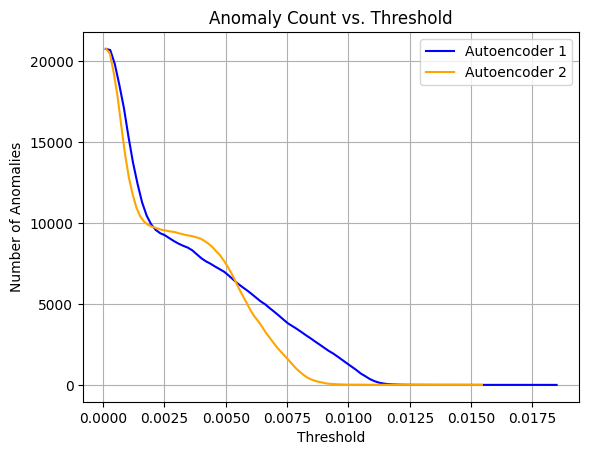

In [121]:
# Anomaly count vs. threshold for Autoencoder 1
thresholds_range_1 = np.linspace(min(reconstruction_error_normal_1), max(reconstruction_error_slow_1), 100)
anomalies_1 = [np.sum(reconstruction_error_slow_1 > t) for t in thresholds_range_1]
plt.plot(thresholds_range_1, anomalies_1, label='Autoencoder 1', color='blue')

# Anomaly count vs. threshold for Autoencoder 2
thresholds_range_2 = np.linspace(min(reconstruction_error_normal_2), max(reconstruction_error_slow_2), 100)
anomalies_2 = [np.sum(reconstruction_error_slow_2 > t) for t in thresholds_range_2]
plt.plot(thresholds_range_2, anomalies_2, label='Autoencoder 2', color='orange')

plt.xlabel('Threshold')
plt.ylabel('Number of Anomalies')
plt.title('Anomaly Count vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


i choosed percentile 95 

Metrics for Autoencoder 1:
{'accuracy': 0.8708784623095865, 'precision': 0.6018934750034055, 'recall': 0.42553089035488995, 'f1': 0.4985754182064374, 'roc_auc': 0.6447365477740976}
Metrics for Autoencoder 2:
{'accuracy': 0.8765881404319306, 'precision': 0.6221230928368244, 'recall': 0.4633794000096307, 'f1': 0.5311439216227405, 'roc_auc': 0.6830493985185477}


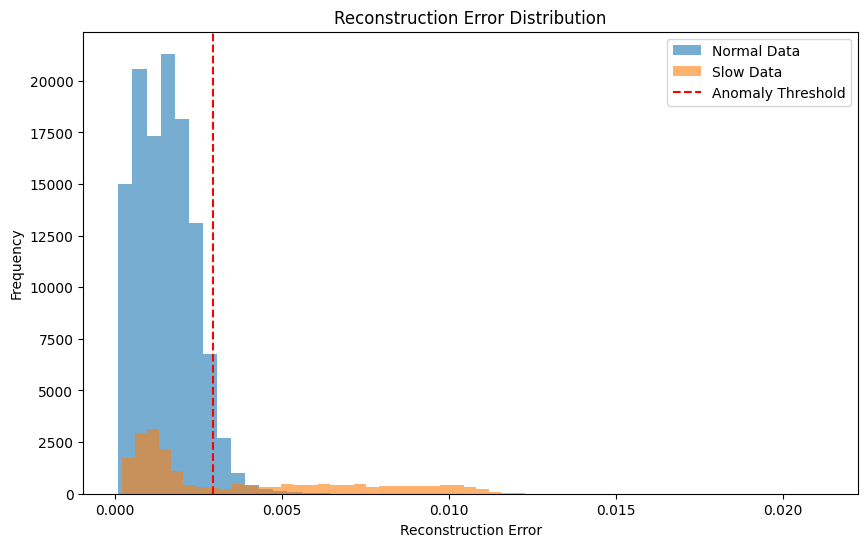

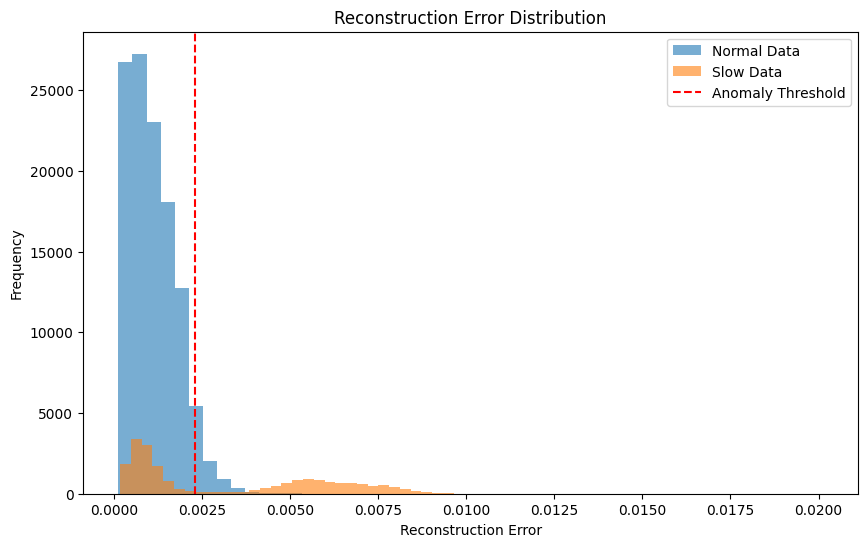

In [122]:
#Create labels for classification (1 = anomaly, 0 = normal)
normal_labels_1 = np.zeros(len(reconstruction_error_normal_1))
slow_labels_1 = np.ones(len(reconstruction_error_slow_1))
normal_labels_2 = np.zeros(len(reconstruction_error_normal_1))
slow_labels_2 = np.ones(len(reconstruction_error_slow_1))

# Combine data and labels
reconstruction_errors_1 = np.concatenate([reconstruction_error_normal_1, reconstruction_error_slow_1])
reconstruction_errors_2 = np.concatenate([reconstruction_error_normal_2, reconstruction_error_slow_2])

true_labels = np.concatenate([normal_labels_1, slow_labels_1])
true_labels_1 = np.concatenate([normal_labels_2, slow_labels_2])

# Step 3: Predict anomalies based on the threshold
# Evaluation function
def evaluate_autoencoder(reconstruction_errors, true_labels, threshold):
    predicted_labels = (reconstruction_errors > threshold).astype(int)
    metrics = {
        "accuracy": accuracy_score(true_labels, predicted_labels),
        "precision": precision_score(true_labels, predicted_labels),
        "recall": recall_score(true_labels, predicted_labels),
        "f1": f1_score(true_labels, predicted_labels),
        "roc_auc": roc_auc_score(true_labels, reconstruction_errors),
    }
    return metrics


# Evaluate Autoencoder 1
metrics_1 = evaluate_autoencoder(reconstruction_errors_1, true_labels, thresholds['autoencoder_1_95'])
print("Metrics for Autoencoder 1:")
print(metrics_1)

# Evaluate Autoencoder 2
metrics_2 = evaluate_autoencoder(reconstruction_errors_2, true_labels, thresholds['autoencoder_2_95'])
print("Metrics for Autoencoder 2:")
print(metrics_2)


# Step 5: Visualize the reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error_normal_1, bins=50, alpha=0.6, label='Normal Data')
plt.hist(reconstruction_error_slow_1, bins=50, alpha=0.6, label='Slow Data')
plt.axvline(x=thresholds['autoencoder_1_95'], color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# ----------------------
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_error_normal_2, bins=50, alpha=0.6, label='Normal Data')
plt.hist(reconstruction_error_slow_2, bins=50, alpha=0.6, label='Slow Data')
plt.axvline(x=thresholds['autoencoder_2_95'], color='red', linestyle='--', label='Anomaly Threshold')
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


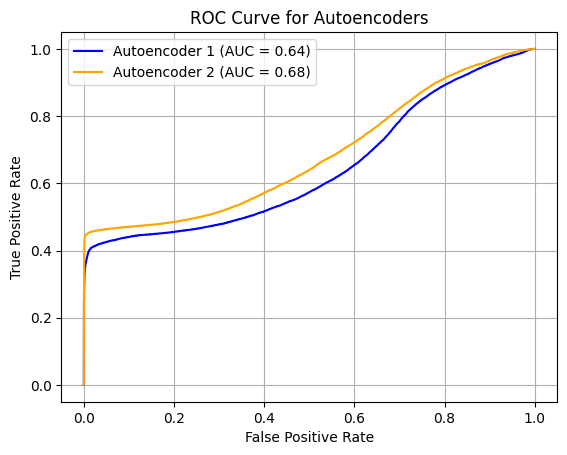

In [123]:
from sklearn.metrics import roc_auc_score, roc_curve

# Autoencoder 1
fpr_1, tpr_1, _ = roc_curve(true_labels, reconstruction_errors_1)
auc_score_1 = roc_auc_score(true_labels, reconstruction_errors_1)
plt.plot(fpr_1, tpr_1, label=f"Autoencoder 1 (AUC = {auc_score_1:.2f})", color='blue')

# Autoencoder 2
fpr_2, tpr_2, _ = roc_curve(true_labels, reconstruction_errors_2)
auc_score_2 = roc_auc_score(true_labels, reconstruction_errors_2)
plt.plot(fpr_2, tpr_2, label=f"Autoencoder 2 (AUC = {auc_score_2:.2f})", color='orange')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Autoencoders')
plt.legend()
plt.grid(True)
plt.show()


# TRYYYYY : 
## Adversarial Loss and Discriminator

In [ ]:
def build_discriminator(input_shape, learning_rate=0.005):
    if isinstance(input_shape, int):
        input_shape = (input_shape,)

    model = models.Sequential([
        layers.Input(shape=input_shape),                         # Input layer
        layers.Dense(256),                                       # First dense layer
        layers.LeakyReLU(alpha=0.2),                            # Leaky ReLU activation
        layers.LayerNormalization(),                            # Layer normalization

        layers.Dense(128),                                       # Second dense layer
        layers.LeakyReLU(alpha=0.2),                            # Leaky ReLU activation
        layers.LayerNormalization(),                            # Layer normalization
        layers.Dropout(0.4),                                    # Dropout for regularization

        layers.Dense(64),                                        # Third dense layer
        layers.LeakyReLU(alpha=0.2),                            # Leaky ReLU activation
        layers.LayerNormalization(),                            # Layer normalization
        layers.Dropout(0.3),                                    # Additional dropout

        layers.Dense(1, activation='sigmoid')                   # Output layer (binary classification)
    ])

    # Compile the model with Adam optimizer and label smoothing in loss
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, beta_1=0.5),
        loss=tf.keras.losses.BinaryCrossentropy(label_smoothing=0.1),  # Label smoothing for stability
        metrics=['accuracy']
    )
    return model


In [125]:
autoencoder_1.trainable = False
autoencoder_2.trainable = False


In [126]:
# Create adversarial model combining autoencoder and discriminator
def build_adversarial_model(autoencoder, discriminator):
    model = models.Sequential([
        autoencoder,
        discriminator
    ])
    return model

In [127]:
input_shape = X_normal_minmax_flat_5.shape[1]  # Flattened window size

# Cross Validation to find best learning rate

Testing Discriminator LR: 0.0001, Adversarial LR: 0.001


c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 1/20 - D1 Acc: 0.5020, D2 Acc: 0.4395
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Epoch 2/20 - D1 Acc: 0.5127, D2 Acc: 0.5400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 3/20 - D1 Acc: 0.5056, D2 Acc: 0.5228
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Epoch 4/20 - D1 Acc: 0.5033, D2 Acc: 0.5158
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 5/20 - D1 Acc: 0.5022, D2 Acc: 0.5121
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 6/20 - D1 Acc: 0.5016, D2 Acc: 0.5098
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Epoch 7/20 - D1 Acc: 0.5013, D2 Acc: 0.5082
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Epoch 8/20 - D1 Acc: 0.5010, D2 Acc: 0.5071
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4

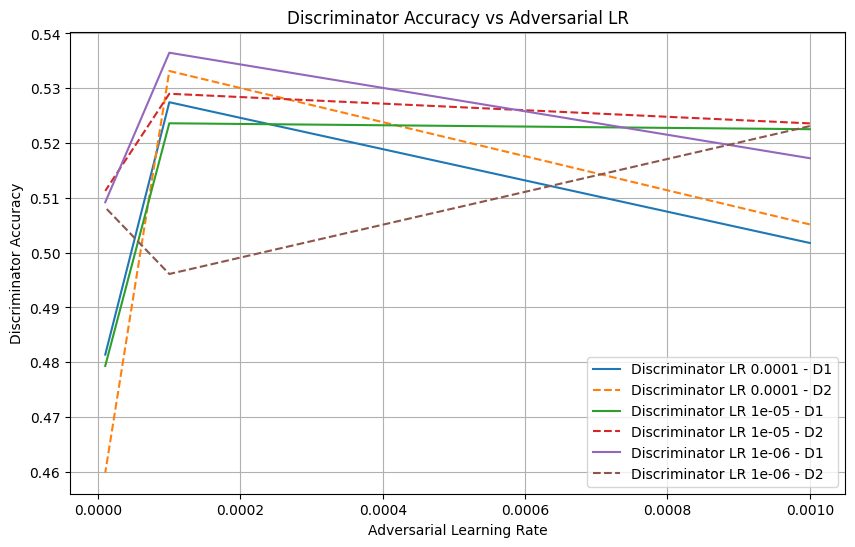

Disc LR    Adv LR     Avg D1 Acc   Avg D2 Acc  
0.0001     0.001      0.5018       0.5052      
0.0001     0.0001     0.5275       0.5332      
0.0001     1e-05      0.4814       0.4598      
1e-05      0.001      0.5225       0.5236      
1e-05      0.0001     0.5236       0.5290      
1e-05      1e-05      0.4793       0.5113      
1e-06      0.001      0.5172       0.5231      
1e-06      0.0001     0.5365       0.4961      
1e-06      1e-05      0.5092       0.5082      


In [144]:
# Define learning rates to test
discriminator_lr_values = [1e-4, 1e-5, 1e-6]
adversarial_lr_values = [1e-3, 1e-4, 1e-5]
results = []

# Loop over learning rate combinations
for disc_lr in discriminator_lr_values:
    for adv_lr in adversarial_lr_values:
        print(f"Testing Discriminator LR: {disc_lr}, Adversarial LR: {adv_lr}")
        
        # Build discriminators
        discriminator_1 = build_discriminator(input_shape)
        discriminator_2 = build_discriminator(input_shape)
        
        optimizer_discriminator_1 = Adam(learning_rate=disc_lr, beta_1=0.5)
        optimizer_discriminator_2 = Adam(learning_rate=disc_lr, beta_1=0.5)
        
        discriminator_1.compile(optimizer=optimizer_discriminator_1, loss='binary_crossentropy', metrics=['accuracy'])
        discriminator_2.compile(optimizer=optimizer_discriminator_2, loss='binary_crossentropy', metrics=['accuracy'])
        
        # Build adversarial models
        adversarial_model_1 = build_adversarial_model(autoencoder_1, discriminator_1)
        adversarial_model_2 = build_adversarial_model(autoencoder_2, discriminator_2)
        
        optimizer_adversarial_1 = Adam(learning_rate=adv_lr, beta_1=0.5)
        optimizer_adversarial_2 = Adam(learning_rate=adv_lr, beta_1=0.5)
        
        adversarial_model_1.compile(optimizer=optimizer_adversarial_1, loss='binary_crossentropy')
        adversarial_model_2.compile(optimizer=optimizer_adversarial_2, loss='binary_crossentropy')
        
        # Training loop
        batch_size = 128
        epochs = 20  # Reduce for cross-validation to save time
        
        d_accuracies_1, d_accuracies_2 = [], []
        for epoch in range(epochs):
            idx = np.random.permutation(X_normal_minmax_flat_5.shape[0])[:batch_size]
            real_data_flat = X_normal_minmax_flat_5[idx]

            # Generate fake data
            fake_data_flat_1 = autoencoder_1.predict(real_data_flat)
            fake_data_flat_2 = autoencoder_2.predict(real_data_flat)

            # Labels
            real_labels = np.ones((batch_size, 1))
            fake_labels = np.zeros((batch_size, 1))
            
            # Train discriminators
            d_loss_real_1, d_acc_real_1 = discriminator_1.train_on_batch(real_data_flat, real_labels)
            d_loss_fake_1, d_acc_fake_1 = discriminator_1.train_on_batch(fake_data_flat_1, fake_labels)
            d_acc_1 = 0.5 * (d_acc_real_1 + d_acc_fake_1)
            
            d_loss_real_2, d_acc_real_2 = discriminator_2.train_on_batch(real_data_flat, real_labels)
            d_loss_fake_2, d_acc_fake_2 = discriminator_2.train_on_batch(fake_data_flat_2, fake_labels)
            d_acc_2 = 0.5 * (d_acc_real_2 + d_acc_fake_2)
            
            # Train adversarial models
            adversarial_labels = np.ones((batch_size, 1))  # Label "real" for adversarial model training
            adversarial_model_1.train_on_batch(real_data_flat, adversarial_labels)
            adversarial_model_2.train_on_batch(real_data_flat, adversarial_labels)
            
            # Log metrics
            d_accuracies_1.append(d_acc_1)
            d_accuracies_2.append(d_acc_2)

            print(f"Epoch {epoch + 1}/{epochs} - D1 Acc: {d_acc_1:.4f}, D2 Acc: {d_acc_2:.4f}")

        # Store results
        avg_acc_1 = np.mean(d_accuracies_1)
        avg_acc_2 = np.mean(d_accuracies_2)
        results.append((disc_lr, adv_lr, avg_acc_1, avg_acc_2))

# Plot results
disc_lr_labels, adv_lr_labels, acc_1_results, acc_2_results = zip(*results)

plt.figure(figsize=(10, 6))
for i, disc_lr in enumerate(discriminator_lr_values):
    acc_1 = [acc_1_results[j] for j in range(len(results)) if results[j][0] == disc_lr]
    acc_2 = [acc_2_results[j] for j in range(len(results)) if results[j][0] == disc_lr]
    plt.plot(adversarial_lr_values, acc_1, label=f'Discriminator LR {disc_lr} - D1')
    plt.plot(adversarial_lr_values, acc_2, label=f'Discriminator LR {disc_lr} - D2', linestyle='--')

plt.title("Discriminator Accuracy vs Adversarial LR")
plt.xlabel("Adversarial Learning Rate")
plt.ylabel("Discriminator Accuracy")
plt.legend()
plt.grid()
plt.show()

# Print tabulated results
print(f"{'Disc LR':<10} {'Adv LR':<10} {'Avg D1 Acc':<12} {'Avg D2 Acc':<12}")
for res in results:
    print(f"{res[0]:<10} {res[1]:<10} {res[2]:<12.4f} {res[3]:<12.4f}")


### Train models with best learning rates

In [145]:
# Build discriminators
discriminator_1 = build_discriminator(input_shape=input_shape)
discriminator_2 = build_discriminator(input_shape=input_shape)

# Optimizers
optimizer_discriminator_1 = Adam(learning_rate=1e-06, beta_1=0.5)
optimizer_discriminator_2 = Adam(learning_rate=0.0001, beta_1=0.5)

discriminator_1.compile(optimizer=optimizer_discriminator_1, 
                        loss='binary_crossentropy', metrics=['accuracy'])
discriminator_2.compile(optimizer=optimizer_discriminator_2, 
                        loss='binary_crossentropy', metrics=['accuracy'])



# Adversarial models
optimizer_adversarial_1 = Adam(learning_rate=0.0001, beta_1=0.5)
optimizer_adversarial_2 = Adam(learning_rate=0.0001, beta_1=0.5)

adversarial_model_1 = build_adversarial_model(autoencoder=autoencoder_1, discriminator = discriminator_1)
adversarial_model_2 = build_adversarial_model(autoencoder=autoencoder_2, discriminator =discriminator_2)

adversarial_model_1.compile(optimizer=optimizer_adversarial_1, loss='binary_crossentropy')
adversarial_model_2.compile(optimizer=optimizer_adversarial_2, loss='binary_crossentropy')

c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/100 - D1 Acc: 0.4766, D2 Acc: 0.5332, D1 Loss: 0.8558, D2 Loss: 0.9089, Adv Loss 1: 0.8439, Adv Loss 2: 1.0889
Epoch 2/100 - D1 Acc: 0.5326, D2 Acc: 0.5234, D1 Loss: 0.7945, D2 Loss: 0.9557, Adv Loss 1: 0.8472, Adv Loss 2: 1.0685
Epoch 3/100 - D1 Acc: 0.5434, D2 Acc: 0.5210, D1 Loss: 0.8199, D2 Loss: 0.9888, Adv Loss 1: 0.8965, Adv Loss 2: 1.0602
Epoch 4/100 - D1 Acc: 0.5368, D2 Acc: 0.5194, D1 Loss: 0.8691, D2 Loss: 1.0050, Adv Loss 1: 0.9307, Adv Loss 2: 1.0567
Epoch 5/100 - D1 Acc: 0.5334, D2 Acc: 0.5138, D1 Loss: 0.9076, D2 Loss: 1.0237, Adv Loss 1: 0.9688, Adv Loss 2: 1.0718
Epoch 6/100 - D1 Acc: 0.5295, D2 Acc: 0.5119, D1 Loss: 0.9636, D2 Loss: 1.0313, Adv Loss 1: 1.0353, Adv Loss 2: 1.0576
Epoch 7/100 - D1 Acc: 0.5244, D2 Acc: 0.5084, D1 Loss: 1.0285, D2 Loss: 1.0302, Adv Loss 1: 1.0922, Adv Loss 2: 1.0579
Epoch 8/100 - D1 Acc: 0.5212, D2 Acc: 0.5067, D1 Loss: 1.0810, D2 Loss: 1.0355, Adv Loss 1: 1.1363, Adv Loss 2: 1.0624
Epoch 9/100 - D1 Acc: 0.5183, D2 Acc: 0.5053, D1

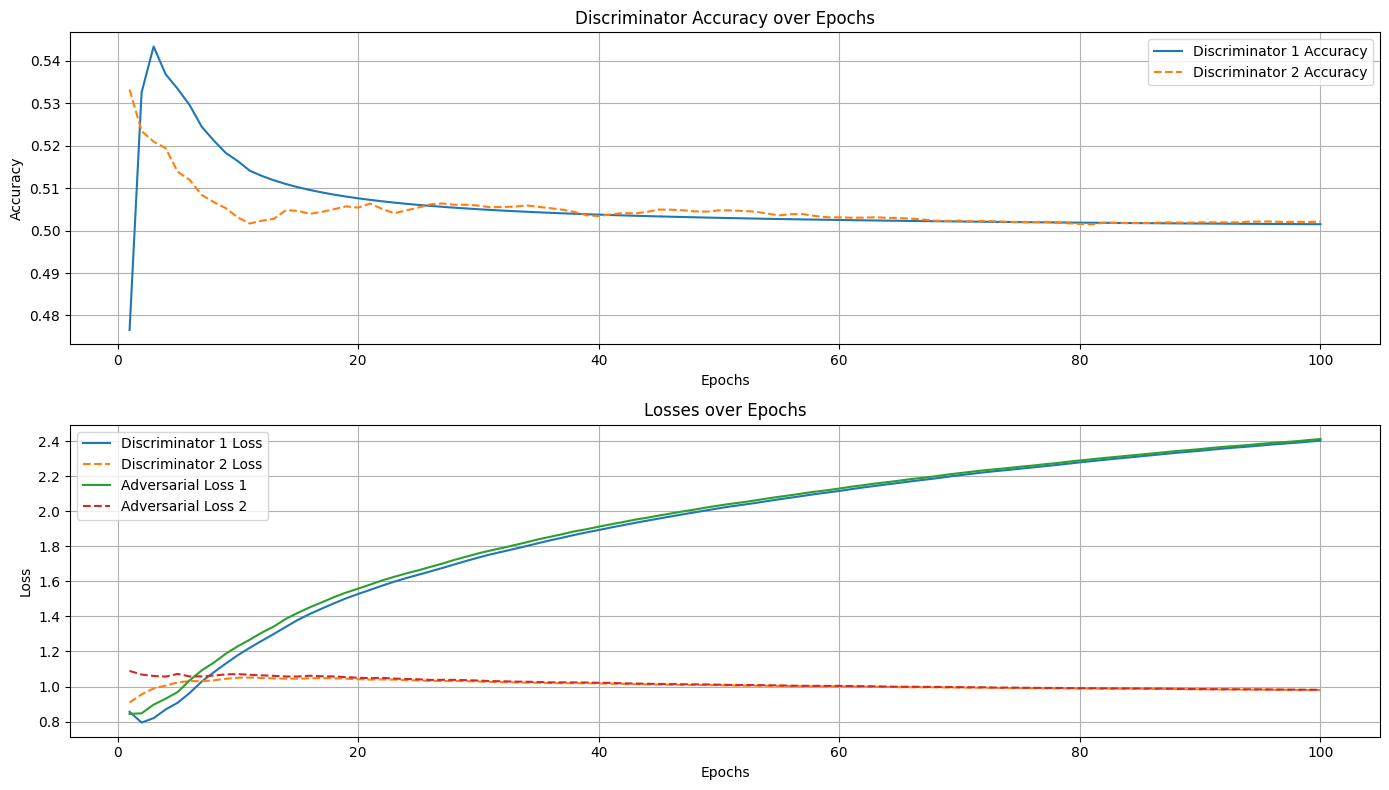

Average Metrics: 
D1 Accuracy: 0.5057, D1 Loss: 1.8963, Adv Loss 1: 1.9178
D2 Accuracy: 0.5046, D2 Loss: 1.0079, Adv Loss 2: 1.0176


In [ ]:
batch_size = min(128, X_normal_minmax_flat_5.shape[0])
epochs = 100

# # Ensure input data matches expected shapes
# assert X_normal_minmax_flat_5.shape[1] == 430, f"Expected input features to be 430, but got {X_normal_minmax_flat_5.shape[1]}."

# Initialize lists to store metrics
d_accuracies_1, d_accuracies_2 = [], []
d_losses_1, d_losses_2 = [], []
adv_losses_1, adv_losses_2 = [], []

for epoch in range(epochs):
    idx = np.random.permutation(X_normal_minmax_flat_5.shape[0])[:batch_size]
    real_data_flat = X_normal_minmax_flat_5[idx]

    # Generate fake data
    fake_data_flat_1 = autoencoder_1(real_data_flat, training=False)
    try:
        fake_data_flat_2 = autoencoder_2(real_data_flat, training=False)
    except ValueError as e:
        print(f"Shape mismatch in epoch {epoch + 1}:")
        print(f"real_data_flat.shape: {real_data_flat.shape}")
        print(f"Expected by autoencoder_2: {autoencoder_2.input_shape}")
        raise e

    # Labels
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))
    
    # Train discriminators
    d_loss_real_1, d_acc_real_1 = discriminator_1.train_on_batch(real_data_flat, real_labels)
    d_loss_fake_1, d_acc_fake_1 = discriminator_1.train_on_batch(fake_data_flat_1, fake_labels)
    d_loss_1 = 0.5 * (d_loss_real_1 + d_loss_fake_1)
    d_acc_1 = 0.5 * (d_acc_real_1 + d_acc_fake_1)
    
    d_loss_real_2, d_acc_real_2 = discriminator_2.train_on_batch(real_data_flat, real_labels)
    d_loss_fake_2, d_acc_fake_2 = discriminator_2.train_on_batch(fake_data_flat_2, fake_labels)
    d_loss_2 = 0.5 * (d_loss_real_2 + d_loss_fake_2)
    d_acc_2 = 0.5 * (d_acc_real_2 + d_acc_fake_2)
    
    # Train adversarial models
    adversarial_labels = np.ones((batch_size, 1))
    adv_loss_1 = adversarial_model_1.train_on_batch(real_data_flat, adversarial_labels)
    adv_loss_2 = adversarial_model_2.train_on_batch(real_data_flat, adversarial_labels)

    adv_loss_1 = adv_loss_1[0] if isinstance(adv_loss_1, (list, tuple)) else adv_loss_1
    adv_loss_2 = adv_loss_2[0] if isinstance(adv_loss_2, (list, tuple)) else adv_loss_2

    # Log metrics
    d_accuracies_1.append(d_acc_1)
    d_accuracies_2.append(d_acc_2)
    d_losses_1.append(d_loss_1)
    d_losses_2.append(d_loss_2)
    adv_losses_1.append(adv_loss_1)
    adv_losses_2.append(adv_loss_2)

    print(f"Epoch {epoch + 1}/{epochs} - D1 Acc: {d_acc_1:.4f}, D2 Acc: {d_acc_2:.4f}, D1 Loss: {d_loss_1:.4f}, D2 Loss: {d_loss_2:.4f}, Adv Loss 1: {adv_loss_1:.4f}, Adv Loss 2: {adv_loss_2:.4f}")

# Plot results
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(range(1, epochs + 1), d_accuracies_1, label='Discriminator 1 Accuracy')
plt.plot(range(1, epochs + 1), d_accuracies_2, label='Discriminator 2 Accuracy', linestyle='--')
plt.title("Discriminator Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(range(1, epochs + 1), d_losses_1, label='Discriminator 1 Loss')
plt.plot(range(1, epochs + 1), d_losses_2, label='Discriminator 2 Loss', linestyle='--')
plt.plot(range(1, epochs + 1), adv_losses_1, label='Adversarial Loss 1')
plt.plot(range(1, epochs + 1), adv_losses_2, label='Adversarial Loss 2', linestyle='--')
plt.title("Losses over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Print summary
avg_acc_1 = np.mean(d_accuracies_1)
avg_acc_2 = np.mean(d_accuracies_2)
avg_d_loss_1 = np.mean(d_losses_1)
avg_d_loss_2 = np.mean(d_losses_2)
avg_adv_loss_1 = np.mean(adv_losses_1)
avg_adv_loss_2 = np.mean(adv_losses_2)

print(f"Average Metrics: \nD1 Accuracy: {avg_acc_1:.4f}, D1 Loss: {avg_d_loss_1:.4f}, Adv Loss 1: {avg_adv_loss_1:.4f}")
print(f"D2 Accuracy: {avg_acc_2:.4f}, D2 Loss: {avg_d_loss_2:.4f}, Adv Loss 2: {avg_adv_loss_2:.4f}")


In [133]:
print(f"Autoencoder Input Shape: {X_train.shape}")
print(f"Discriminator Real Input Shape: {real_data_flat.shape}")
print(f"Discriminator Fake Input Shape: {fake_data_flat_1.shape}")


Autoencoder Input Shape: (116894, 430)
Discriminator Real Input Shape: (128, 430)
Discriminator Fake Input Shape: (128, 430)


In [134]:
print(f"Autoencoder Input Shape: {X_train.shape}")
print(f"Discriminator Input Shape: {input_shape}")

Autoencoder Input Shape: (116894, 430)
Discriminator Input Shape: 430


Evaluating Autoencoder 1:
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:


c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     20767
         1.0       0.85      1.00      0.92    116894

    accuracy                           0.85    137661
   macro avg       0.42      0.50      0.46    137661
weighted avg       0.72      0.85      0.78    137661

Precision: 0.8491
Recall: 1.0000
ROC-AUC: 0.4687


c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


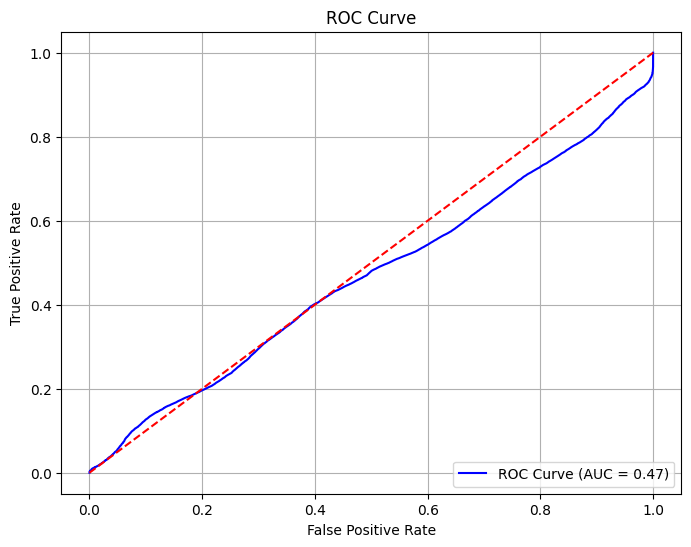


Evaluating Autoencoder 2:
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step
3653/3653 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step
649/649 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Classification Report:


c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     20767
         1.0       0.85      1.00      0.92    116894

    accuracy                           0.85    137661
   macro avg       0.42      0.50      0.46    137661
weighted avg       0.72      0.85      0.78    137661

Precision: 0.8491
Recall: 1.0000
ROC-AUC: 0.4382


c:\Users\Arash\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


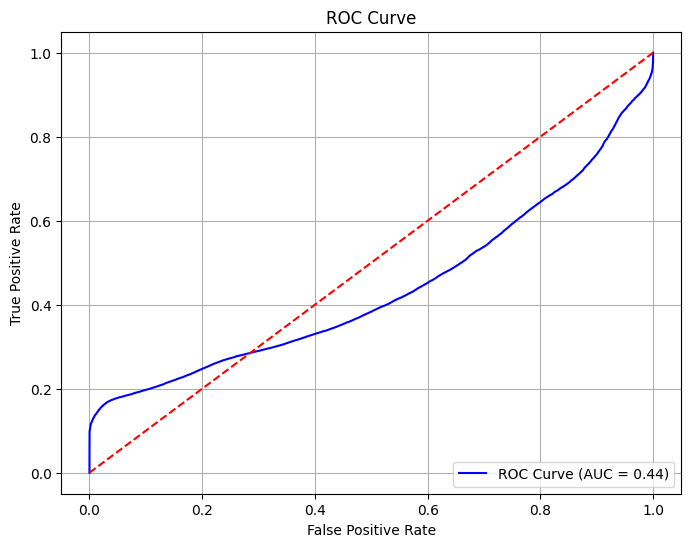

In [140]:
def evaluate_anomalies(discriminator, autoencoder, real_data, anomaly_data, threshold=0.5, plot_roc=True):

    # Flatten the data to match the input shape of the discriminator
    real_data_flat = real_data.reshape(real_data.shape[0], -1)
    anomaly_data_flat = anomaly_data.reshape(anomaly_data.shape[0], -1)
    
    # Generate reconstructed (fake) data for real data using the autoencoder
    fake_data = autoencoder.predict(real_data)
    fake_data_flat = fake_data.reshape(fake_data.shape[0], -1)
    
    # Create labels for real and anomaly data
    real_labels = np.ones(real_data_flat.shape[0])  # Label 1 for real data
    anomaly_labels = np.zeros(anomaly_data_flat.shape[0])  # Label 0 for anomalies
    
    # Get discriminator predictions (scores)
    real_scores = discriminator.predict(real_data_flat).flatten()
    fake_scores = discriminator.predict(fake_data_flat).flatten()
    anomaly_scores = discriminator.predict(anomaly_data_flat).flatten()
    
    # Combine scores and labels
    all_scores = np.concatenate([real_scores, anomaly_scores])
    all_labels = np.concatenate([real_labels, anomaly_labels])
    
    # Compute binary predictions using the threshold
    binary_predictions = all_scores > threshold
    
    # Compute evaluation metrics
    precision = precision_score(all_labels, binary_predictions)
    recall = recall_score(all_labels, binary_predictions)
    roc_auc = roc_auc_score(all_labels, all_scores)

    
    # Print classification report
    print("Classification Report:")
    print(classification_report(all_labels, binary_predictions))
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Plot ROC Curve if enabled
    if plot_roc:
        fpr, tpr, _ = roc_curve(all_labels, all_scores)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color="blue")
        plt.plot([0, 1], [0, 1], color="red", linestyle="--")
        plt.title("ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()
    
    return precision, recall, roc_auc

# Test the trained models with both autoencoders and discriminators
print("Evaluating Autoencoder 1:")
precision_1_adversarial, recall_1_adversarial, roc_auc_1_adversarial = evaluate_anomalies(
    discriminator=discriminator_1, 
    autoencoder=autoencoder_1, 
    real_data=X_normal_minmax_flat_5, 
    anomaly_data=X_slow_minmax_flat_5
)

print("\nEvaluating Autoencoder 2:")
precision_2_adversarial, recall_2_adversarial, roc_auc_2_adversarial = evaluate_anomalies(
    discriminator=discriminator_2, 
    autoencoder=autoencoder_2, 
    real_data=X_normal_minmax_flat_5, 
    anomaly_data=X_slow_minmax_flat_5
)




In [141]:
metrics_1_reconstruction = evaluate_autoencoder(reconstruction_errors_1, true_labels, thresholds['autoencoder_1_95'])
precision_1_reconstruction = metrics_1_reconstruction['precision']
recall_1_reconstruction = metrics_1_reconstruction['recall']
roc_auc_1_reconstruction = metrics_1_reconstruction['roc_auc']


metrics_2_reconstruction = evaluate_autoencoder(reconstruction_errors_2, true_labels, thresholds['autoencoder_1_95'])
precision_2_reconstruction = metrics_2_reconstruction['precision']
recall_2_reconstruction = metrics_2_reconstruction['recall']
roc_auc_2_reconstruction = metrics_2_reconstruction['roc_auc']


In [142]:
metrics_comparison = {
    "Model": ["AE1 (Reconstruction)", "AE1 (Adversarial)", 
              "AE2 (Reconstruction)", "AE2 (Adversarial)"],
    "Precision": [precision_1_reconstruction, precision_1_adversarial, 
                  precision_2_reconstruction, precision_2_adversarial],
    "Recall": [recall_1_reconstruction, recall_1_adversarial, 
               recall_2_reconstruction, recall_2_adversarial],
    "F1-Score": [2 * (precision_1_reconstruction * recall_1_reconstruction) / (precision_1_reconstruction + recall_1_reconstruction),
                 2 * (precision_1_adversarial * recall_1_adversarial) / (precision_1_adversarial + recall_1_adversarial),
                 2 * (precision_2_reconstruction * recall_2_reconstruction) / (precision_2_reconstruction + recall_2_reconstruction),
                 2 * (precision_2_adversarial * recall_2_adversarial) / (precision_2_adversarial + recall_2_adversarial)],
    "ROC AUC": [roc_auc_1_reconstruction, roc_auc_1_adversarial, 
                roc_auc_2_reconstruction, roc_auc_2_adversarial],
}

metrics_df = pd.DataFrame(metrics_comparison)
print(metrics_df)


                  Model  Precision    Recall  F1-Score   ROC AUC
0  AE1 (Reconstruction)   0.601893  0.425531  0.498575  0.644737
1     AE1 (Adversarial)   0.849144  1.000000  0.918418  0.468701
2  AE2 (Reconstruction)   0.864107  0.454086  0.595328  0.683049
3     AE2 (Adversarial)   0.849144  1.000000  0.918418  0.438201


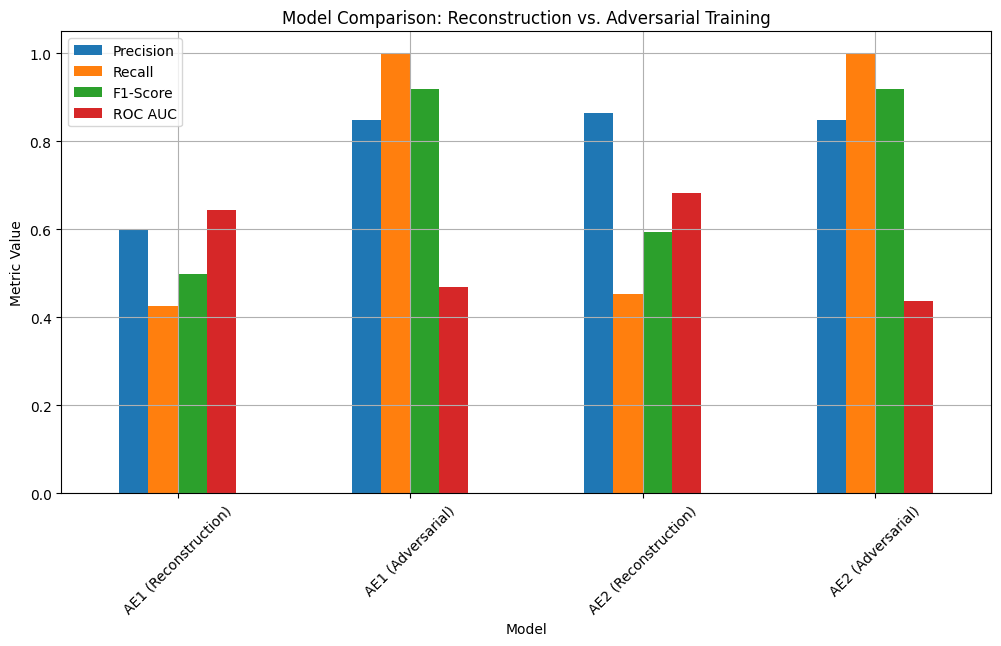

In [143]:
metrics_df.set_index("Model").plot.bar(figsize=(12, 6))
plt.title("Model Comparison: Reconstruction vs. Adversarial Training")
plt.ylabel("Metric Value")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
